In [540]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix


# Reading data

In [541]:
data1 = pd.read_csv('./Data/Dataset1.csv')
data1


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [542]:
data2 = pd.read_csv('./Data/Dataset2.csv')
data2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


<h1 style="color:#FFFFFF;"> Analyse des caractéristiques des attributs du dataset </h1>

<h1 style="color:#FFFFFF;">Part 1 : 1.1 - Données statiques </h1>

<h2 >Class general pour les calcule partie 1.1.</h2>

<style>
    .function{color:#aaaaff;}
</style>
    
elle prend le dataframe en entré et comporte de multiple fonction qui feront tout avec la fonction principale

<h4><span class="function">preprocessData</span>(self,null="drop",outliers="drop",normalisation="minmax"):</h4>

    null : 
qui permet de choisir comment on supprimes les données manquante (drop,mean)

    Outliers : 
qui permet de choisir comment on gere les valeurs aberante (drop,mean,median,Q1Q3)

    normalisation : 
qui permet de choisir la methode de normalisation (minmax,zscore)

In [ ]:
class Dataset:
    def __init__(self, data):
        self.default = data.copy()
        self.data = data
        self.tendance = None
        self.symetrie = None
        self.boxes = None
        self.correlation = None

    def deleteNull(self,dtype="drop"):
        if dtype == "drop":
            self.data = self.data.apply(pd.to_numeric, errors='coerce')
            self.data = self.data.dropna()
        elif dtype == "mean":
            self.data = self.data.apply(pd.to_numeric, errors='coerce')
            self.data = self.data.fillna(self.data.mean())
    
    def mean(self):
        return self.data.mean(numeric_only=True)

    def median(self):
        return self.data.median(numeric_only=True)

    def mode(self):
        mode = self.data.mode(numeric_only=True)
        return mode.mean()
    
    def tendances(self):
        dict = {"mean":self.mean(),"median":self.median(),"mode":self.mode()}
        self.tendance = pd.DataFrame(dict)

    def symetrie(self):
        symetrie = {}

        for i in self.tendance.index:
            if self.tendance['mean'][i] -  self.tendance['median'][i] > (self.tendance['median'][i] * 0.05):
                symetrie[i] = "positive"
            elif self.tendance['mean'][i] - self.tendance['median'][i] < -(self.tendance['mean'][i] * 0.05):
                symetrie[i] = "negative"
            else:
                symetrie[i] = "symetric"

        return symetrie
    
    def setBoxes(self):
        self.boxes = []
        for column in self.data.columns:
            box = self.data.boxplot(column=column,return_type='dict')
            self.boxes.append((column,box))
        plt.clf()
    
    def drawBoxes(self,col=None):
        if col in self.data.columns:
            plt.figure()
            plt.title("boxplot of "+col)   
            dictD = self.data.boxplot(column=col,return_type='dict')
            print("données aberrantes de "+col)
            print(dictD['fliers'][0].get_ydata()) 
            plt.show()
            return None
        for col in self.data.columns:
            plt.figure()
            plt.title("boxplot of "+col)   
            dictD = self.data.boxplot(column=col,return_type='dict')
            print("données aberrantes de "+col)
            print(dictD['fliers'][0].get_ydata()) 
            plt.show()

    def drawHist(self,col=None):
        if col in self.data.columns:
            plt.figure(figsize=(3, 2))
            self.data.hist(column=col)
            plt.title(f'Histogram of {col}')
            return None
        for column in self.data.columns:  
            plt.figure(figsize=(3, 2))
            self.data.hist(column=column,)
            plt.title(f'Histogram of {column}')

    def deleteOutliers(self,dtype="drop"):
        if not self.boxes:
            self.setBoxes()
        if dtype == "drop":
            
            for i in range(len(self.boxes)):
                for outlier in self.boxes[i][1]['fliers'][0].get_ydata():
                    self.data = self.data[ self.data[self.boxes[i][0]] != outlier] 
        elif dtype == "mean":
            if not self.tendance:
                self.tendances()
            for i in range(len(self.boxes)):
                for outlier in self.boxes[i][1]['fliers'][0].get_ydata():
                    self.data.loc[self.data[self.boxes[i][0]] == outlier, self.boxes[i][0]] = self.tendance["mean"][i]
        elif dtype == "median":
            if not self.tendance:
                self.tendances()
            for i in range(len(self.boxes)):
                for outlier in self.boxes[i][1]['fliers'][0].get_ydata():
                    self.data.loc[self.data[self.boxes[i][0]] == outlier, self.boxes[i][0]] = self.tendance["median"][i]
        elif dtype == "Q1Q3":
            for i in range(len(self.boxes)):
                for outlier in self.boxes[i][1]['fliers'][0].get_ydata():
                    if outlier > self.data[self.boxes[i][0]].mean():
                        self.data.loc[self.data[self.boxes[i][0]] == outlier, self.boxes[i][0]] = self.boxes[i][1]['whiskers'][1].get_ydata()[0]
                    if outlier < self.data[self.boxes[i][0]].mean():
                        self.data.loc[self.data[self.boxes[i][0]] == outlier, self.boxes[i][0]] = self.boxes[i][1]['whiskers'][0].get_ydata()[0]
    
    def normalisation(self,dtype="minmax"):
        if dtype == "minmax":
            self.data = (self.data - self.data.min()) / (self.data.max() - self.data.min())
        elif dtype == "zscore":
            self.data = (self.data - self.data.mean()) / self.data.std()

    def setCorrelation(self,i=None,j=None):
        if i in self.data.columns and j in self.data.columns:
            return self.data[i].corr(self.data[j])
        
        self.correlation = self.data.corr()
        return self.correlation
    
    def dropCorrelation(self,threshold=0.8):

        if type(self.correlation) == type(None):
            self.setCorrelation()
        # Identify pairs of columns with correlation above the threshold
        high_corr_pairs = []
        for i in range(len(self.correlation.columns)):
            for j in range(i+1, len(self.correlation.columns)):
                if abs(self.correlation.iloc[i, j]) > threshold:
                    high_corr_pairs.append((self.correlation.columns[i], self.correlation.columns[j]))

        print(len(high_corr_pairs))
        # Drop one column from each highly correlated pair
        for col1, col2 in high_corr_pairs:
            # Drop the column with the higher correlation with other columns
            if col1 in self.data.columns and col2 in self.data.columns and col1 != "Fertility" and col2 != "Fertility":
                if abs(self.correlation[col1].mean()) > abs(self.correlation[col2].mean()):
                    self.data = self.data.drop(col1, axis=1)
                else:
                    self.data = self.data.drop(col2, axis=1)

    def Scatter(self,i=None,j=None):

        if i in self.data.columns and j in self.data.columns:
            plt.figure(figsize=(6, 4))
            plt.scatter(self.data[i], self.data[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title(f'Scatter plot of {i} and {j}')
            plt.show()
            return None
        
        for i in data1.columns:
            for j in data1.columns[data1.columns.get_loc(i)+1:]:
                plt.figure(figsize=(6, 4))
                plt.scatter(data1[i], data1[j])
                plt.xlabel(i)
                plt.ylabel(j)
                plt.title(f'Scatter plot of {i} and {j}')
                plt.show()

    def preprocessData(self,null="drop",outliers="drop",normalisation="minmax"):
        self.deleteNull(dtype=null)
        
        if outliers:
            self.deleteOutliers(dtype=outliers)
        
        if normalisation:
            self.normalisation(dtype=normalisation)

    def resetData(self):
        self.data = self.default.copy()



Instanciaton 

In [550]:
Set = Dataset(data1)

Set.preprocessData(null="drop",outliers="Q1Q3",normalisation="minmax")

Set.data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.264264,0.435115,0.552288,0.458716,0.560000,0.512821,0.371469,0.250000,0.009671,0.338308,0.447683,0.047170,0.512821,0.0
1,0.489489,0.351145,0.189542,0.605505,0.733333,0.820513,0.572740,0.338235,0.062863,0.721393,0.144716,0.518868,0.820513,0.0
2,0.339339,0.511450,0.810458,0.577982,0.413333,0.863248,0.964689,0.338235,0.062863,0.736318,0.134826,0.518868,0.863248,0.0
3,0.321321,0.297710,0.413399,0.623853,0.506667,0.717949,0.572740,0.397059,0.031915,0.716418,0.132223,0.518868,0.717949,0.0
4,0.660661,0.534351,0.362745,0.614679,0.266667,0.649573,0.788136,0.264706,0.053191,0.796020,0.120770,0.518868,0.649573,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.678679,0.480916,0.241830,0.605505,0.560000,0.333333,0.423729,0.514706,0.324952,0.268657,0.331598,0.245283,0.333333,0.5
881,0.810811,0.832061,0.276144,0.385321,0.600000,0.829060,0.338277,0.750000,0.422631,0.462687,0.684019,0.443396,0.829060,1.0
882,0.642643,0.564885,0.413399,0.486239,0.720000,0.666667,0.700565,0.558824,0.691489,0.885572,0.547631,0.537736,0.666667,0.0
883,0.510511,0.435115,0.362745,0.431193,0.600000,0.529915,0.781073,0.441176,0.043520,0.402985,0.108277,0.518868,0.529915,0.0


<Figure size 640x480 with 0 Axes>

<h3 style="color:#FFFFFF;">Construire une boîte à moustache et afficher les données aberrantes.</h3>


données aberrantes de N
[]


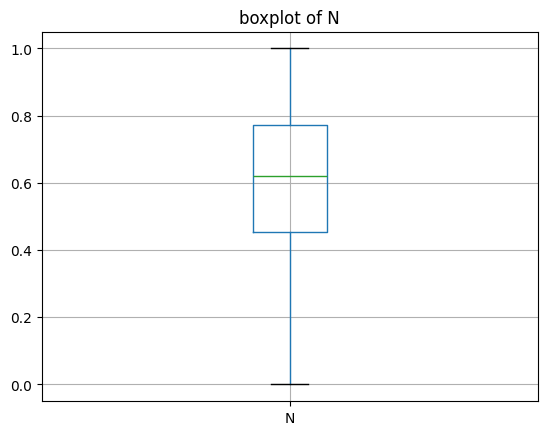

données aberrantes de P
[]


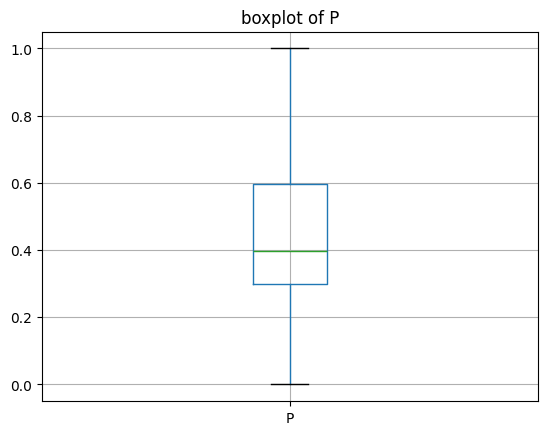

données aberrantes de K
[]


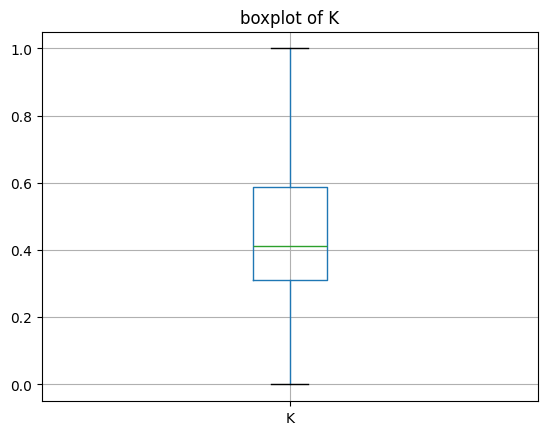

données aberrantes de pH
[1.0]


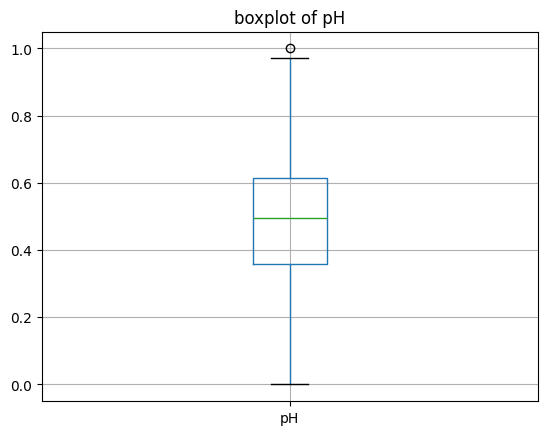

données aberrantes de EC
[]


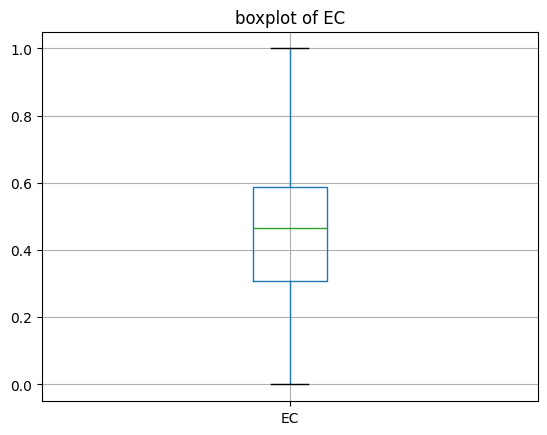

données aberrantes de OC
[]


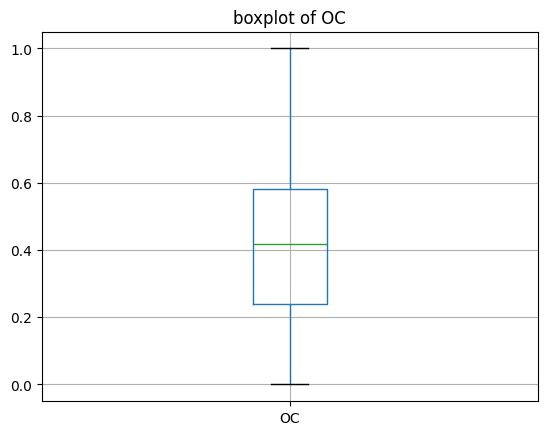

données aberrantes de S
[]


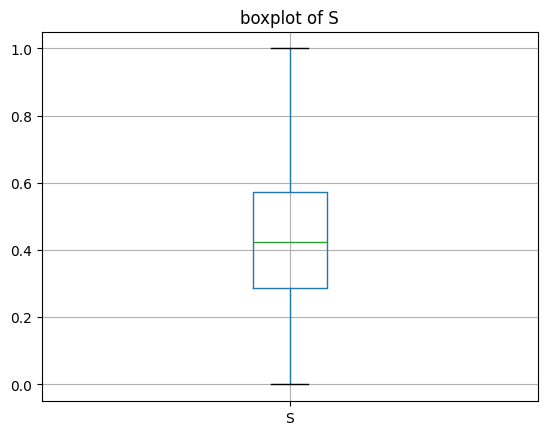

données aberrantes de Zn
[]


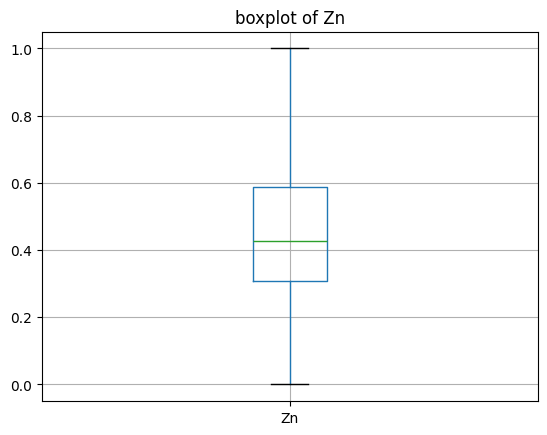

données aberrantes de Fe
[]


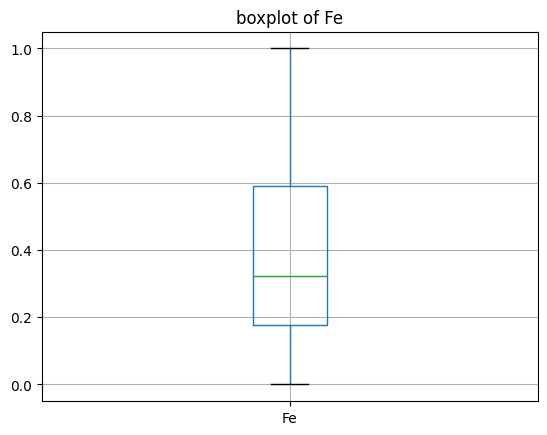

données aberrantes de Cu
[]


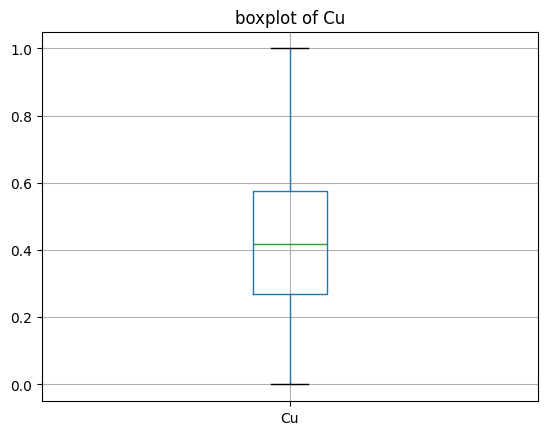

données aberrantes de Mn
[]


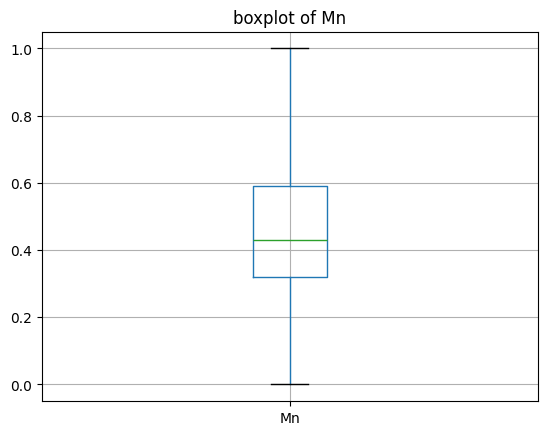

données aberrantes de B
[]


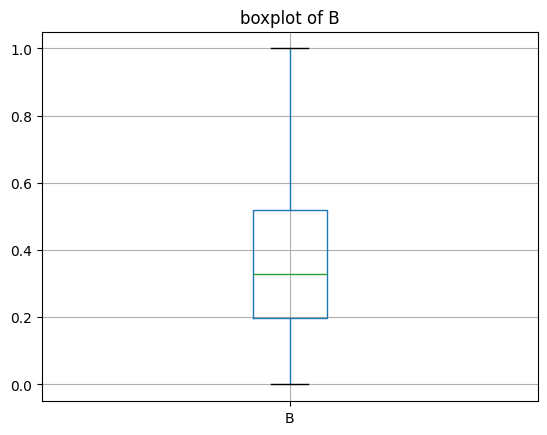

données aberrantes de OM
[]


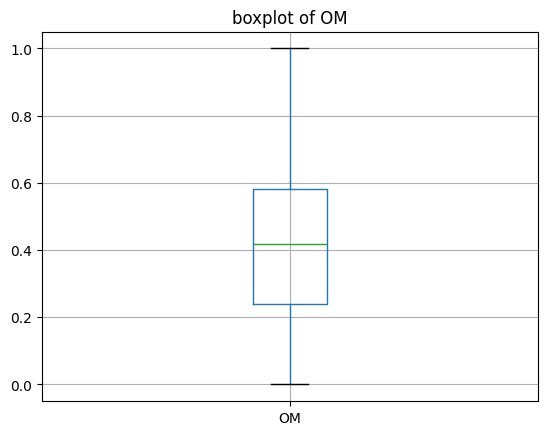

données aberrantes de Fertility
[]


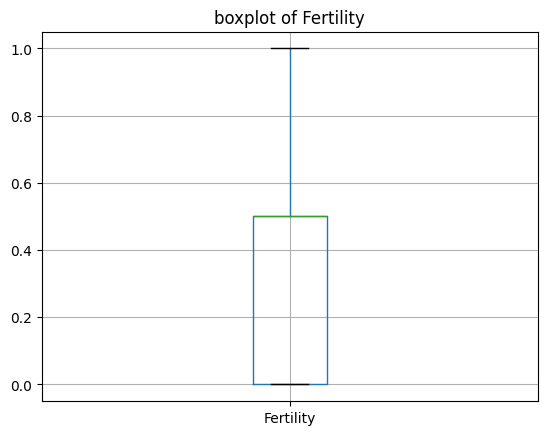

In [551]:
Set.drawBoxes()

<h3> Affichage des histogrammes </h3>

C:\Users\Mekki\AppData\Local\Temp\ipykernel_5784\3321397562.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 2))


<Figure size 300x200 with 0 Axes>

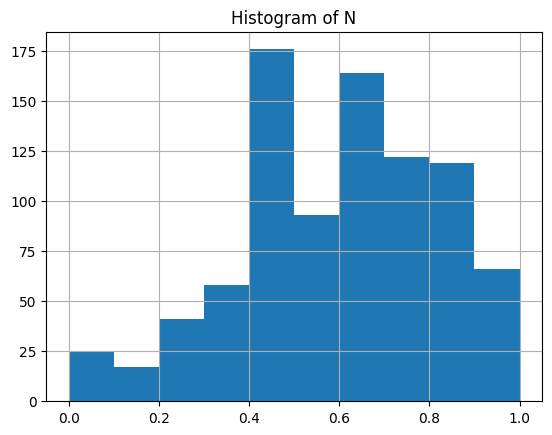

<Figure size 300x200 with 0 Axes>

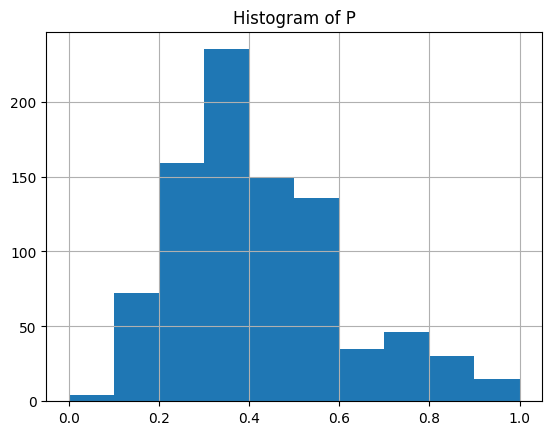

<Figure size 300x200 with 0 Axes>

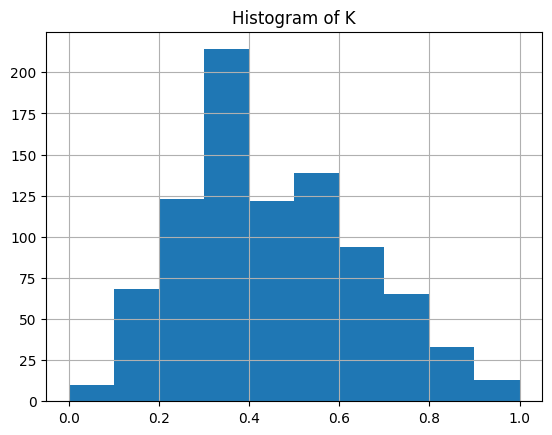

<Figure size 300x200 with 0 Axes>

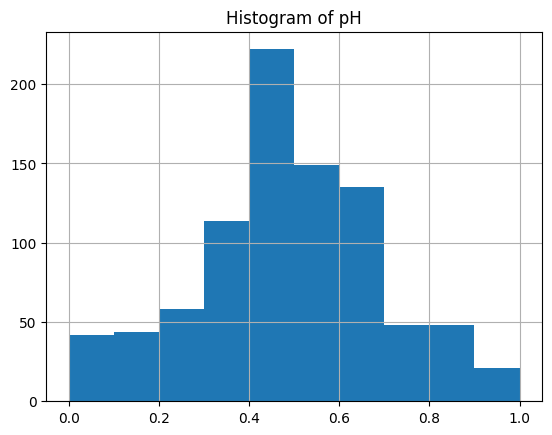

<Figure size 300x200 with 0 Axes>

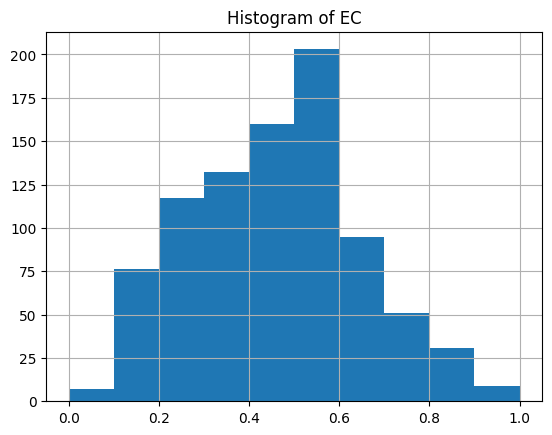

<Figure size 300x200 with 0 Axes>

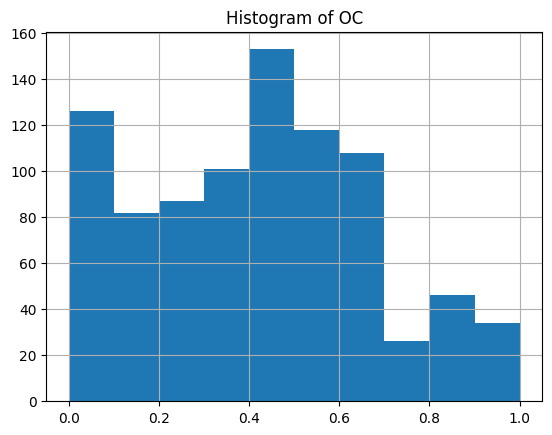

<Figure size 300x200 with 0 Axes>

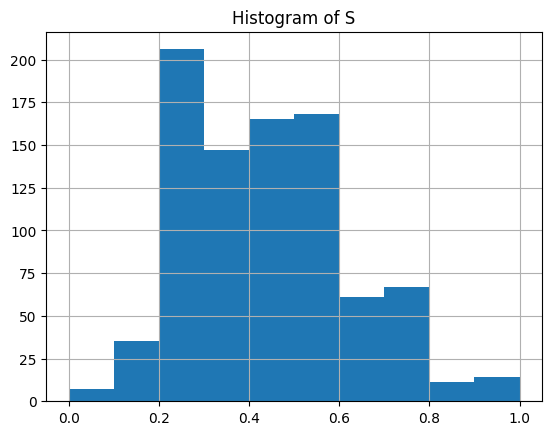

<Figure size 300x200 with 0 Axes>

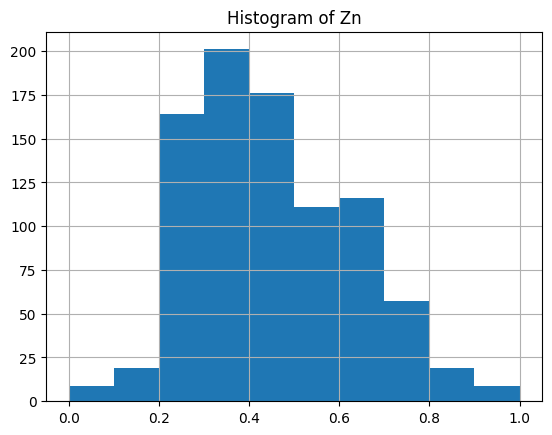

<Figure size 300x200 with 0 Axes>

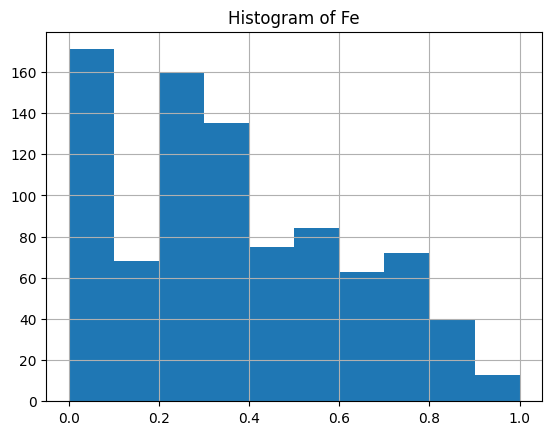

<Figure size 300x200 with 0 Axes>

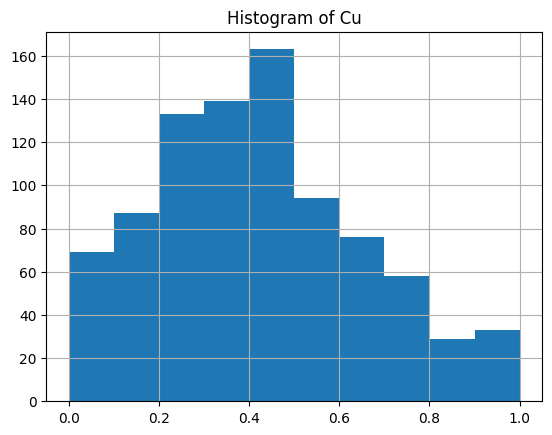

<Figure size 300x200 with 0 Axes>

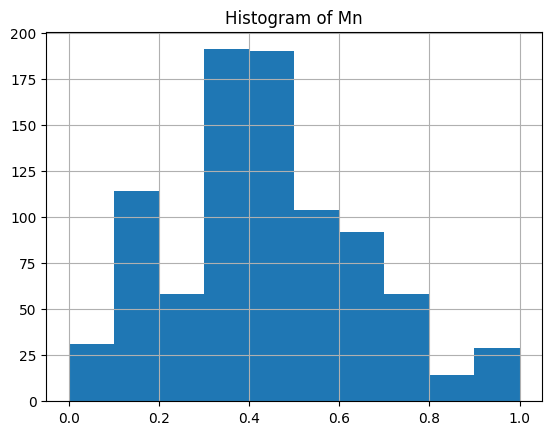

<Figure size 300x200 with 0 Axes>

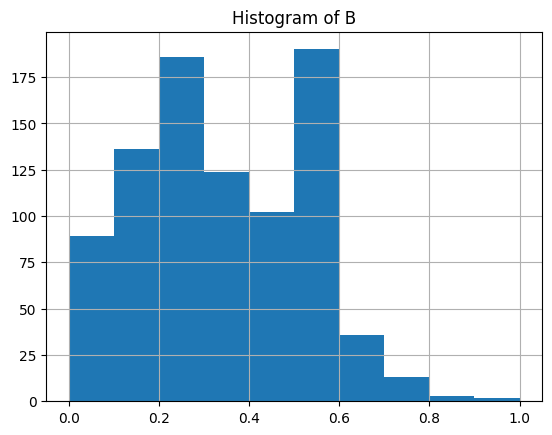

<Figure size 300x200 with 0 Axes>

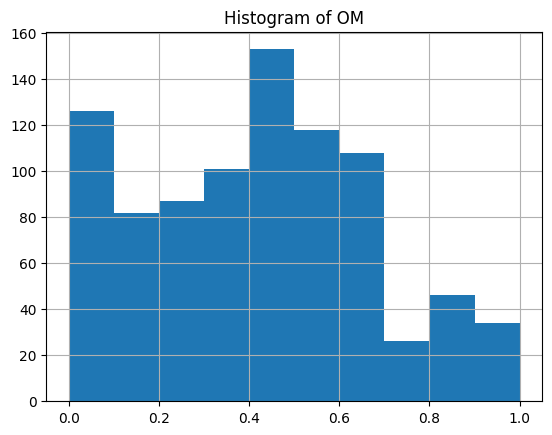

<Figure size 300x200 with 0 Axes>

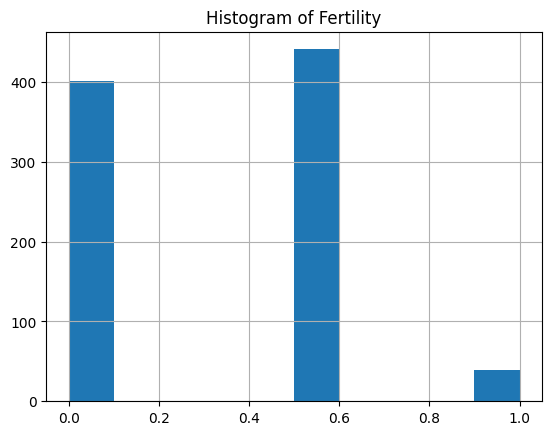

In [552]:
Set.drawHist()

<h3> Graph de données </h3>

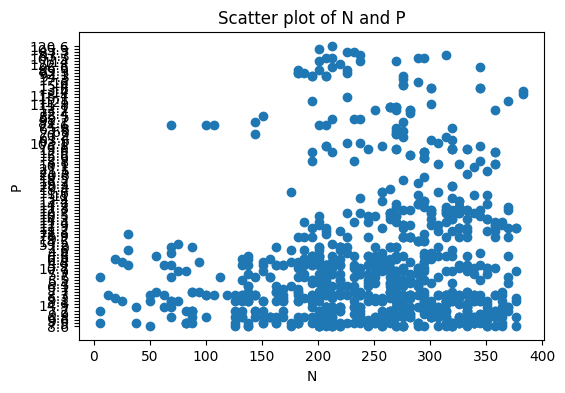

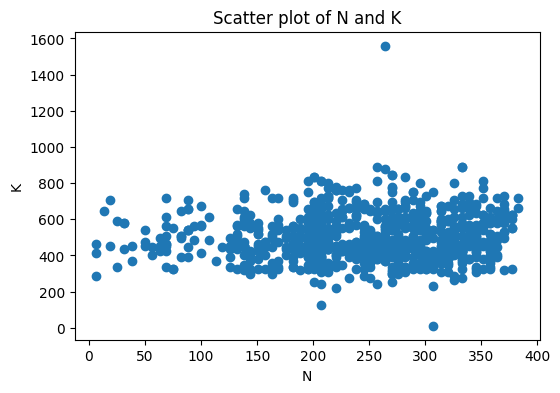

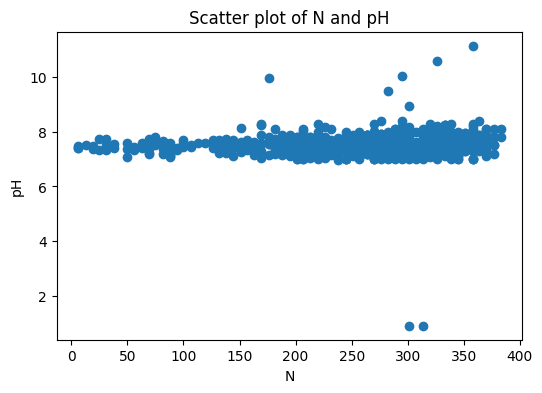

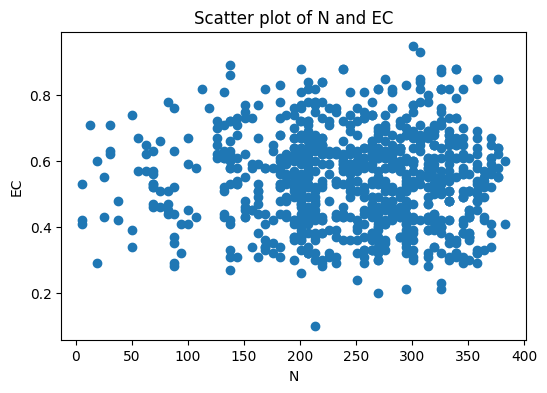

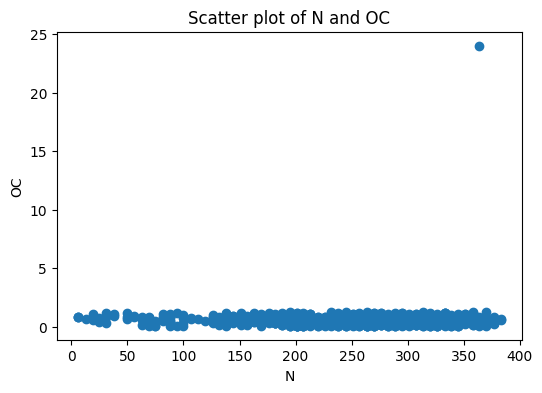

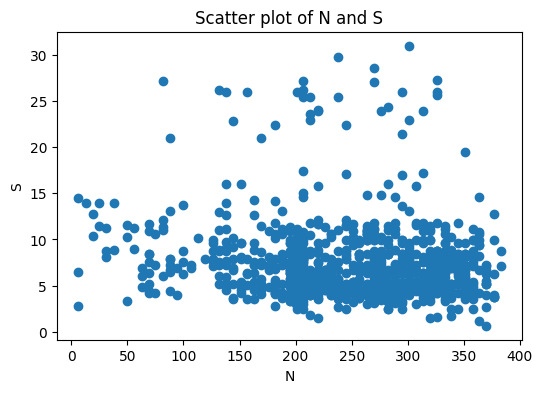

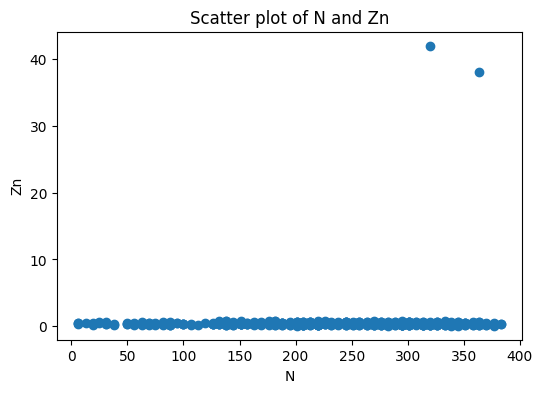

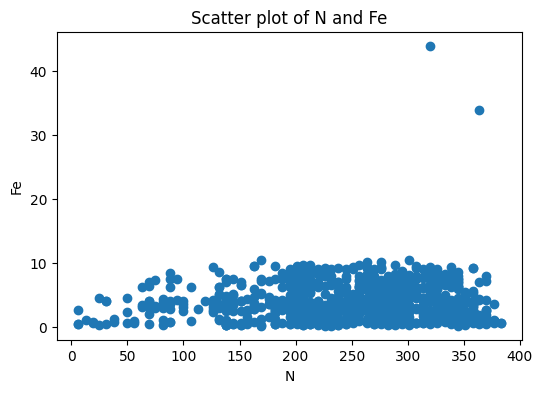

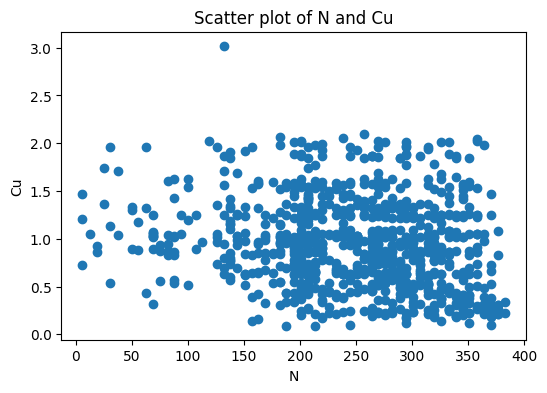

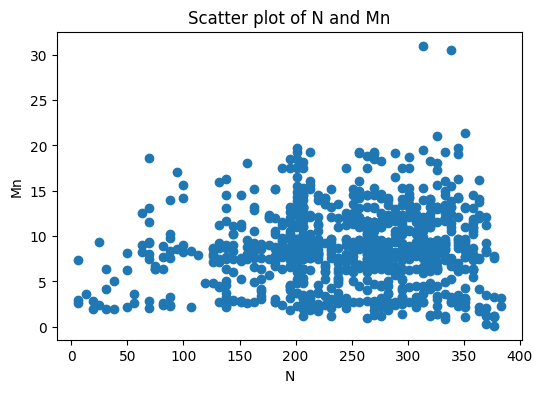

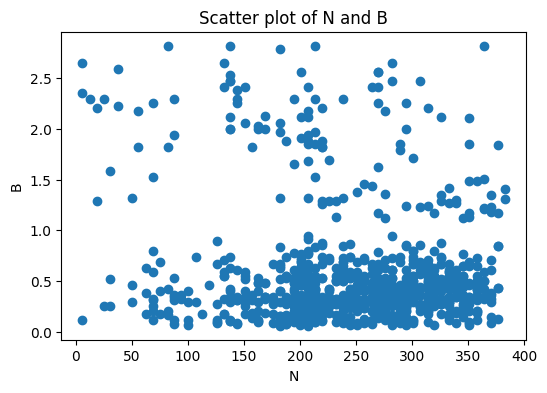

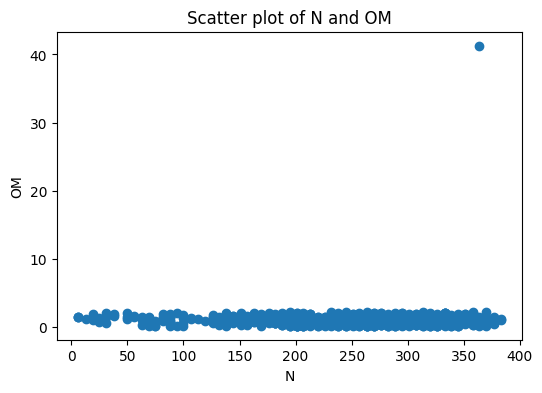

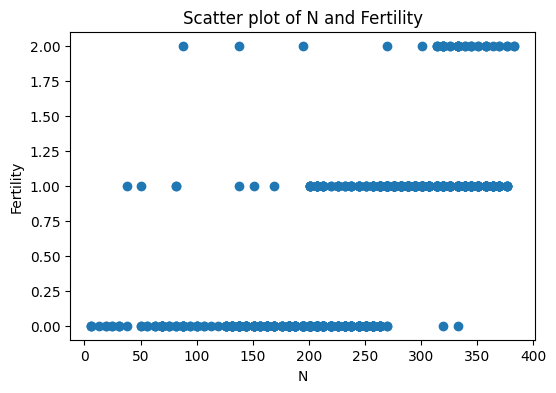

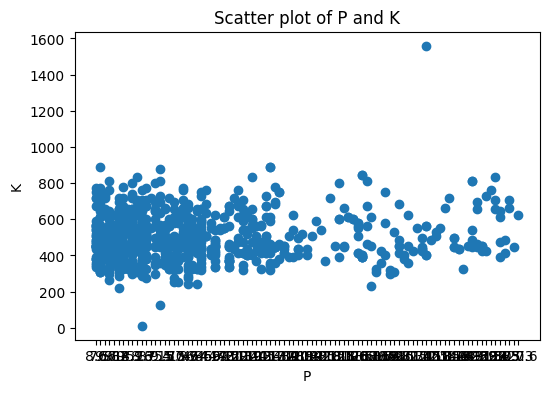

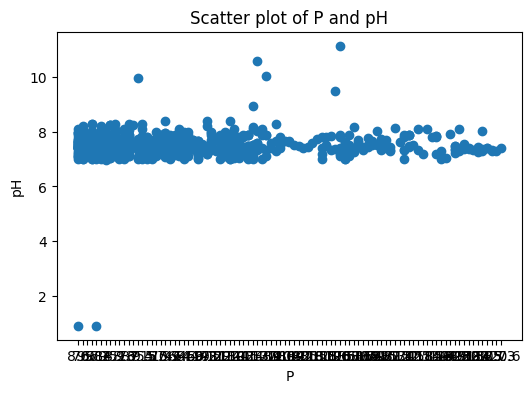

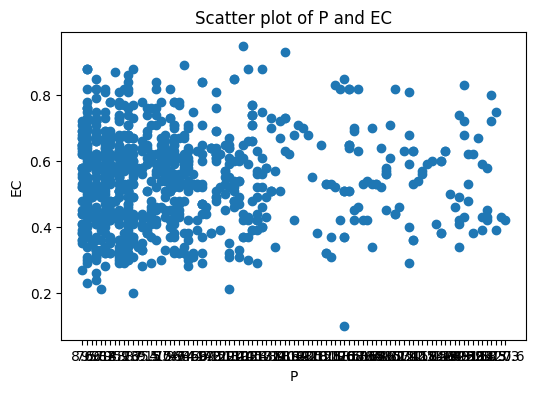

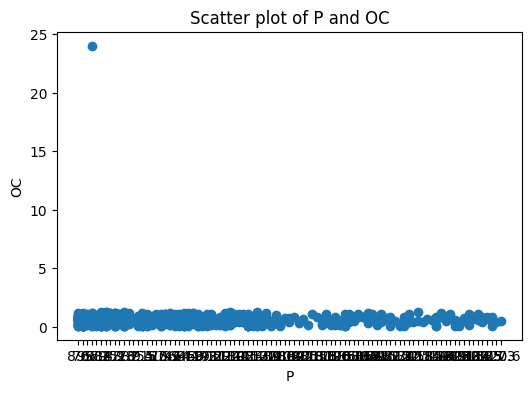

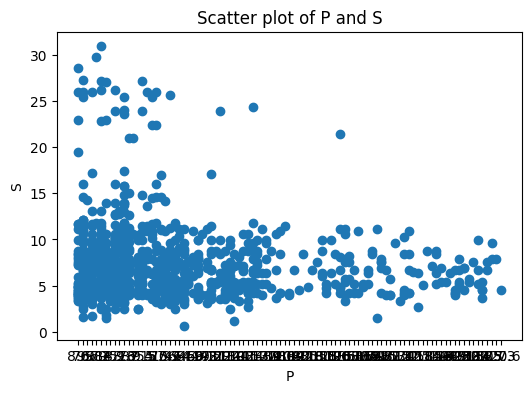

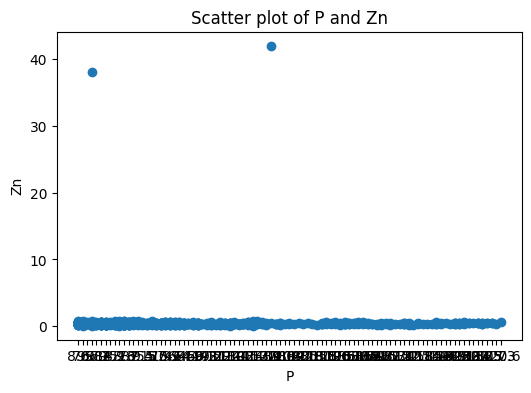

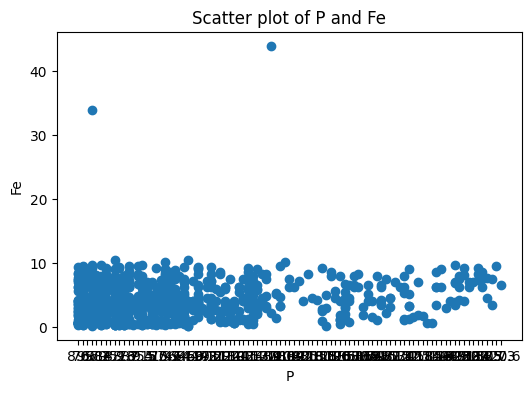

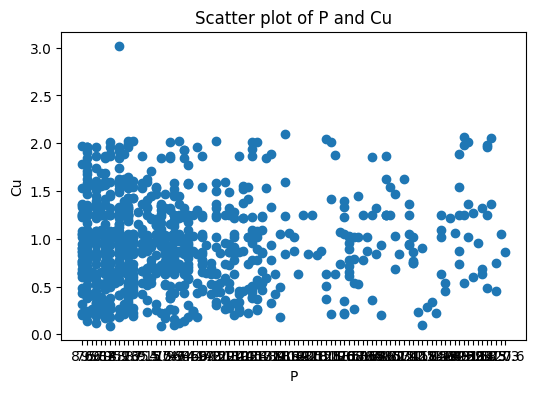

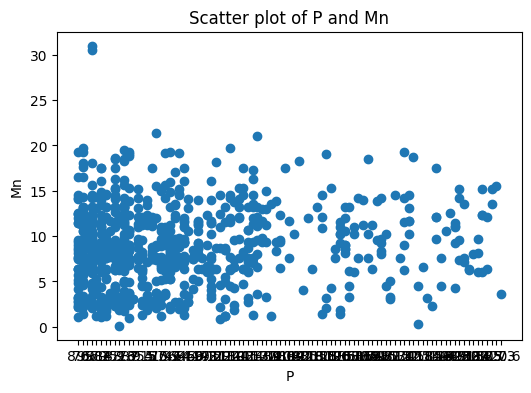

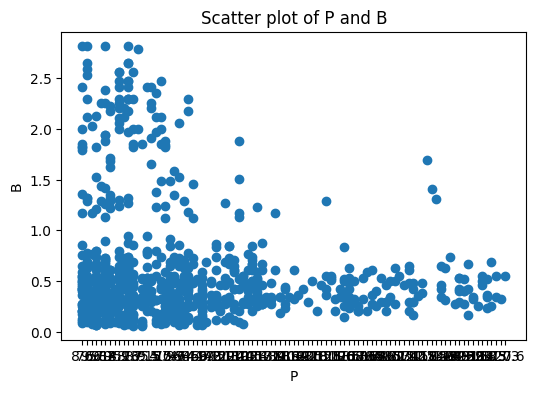

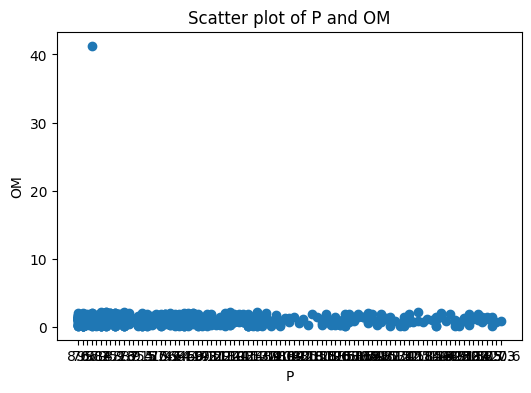

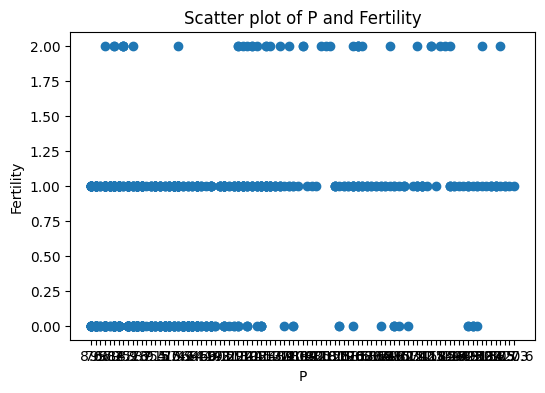

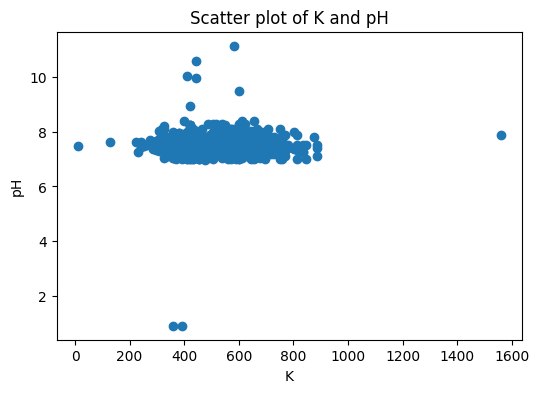

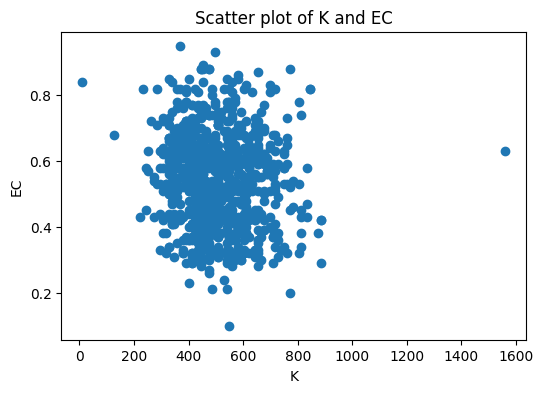

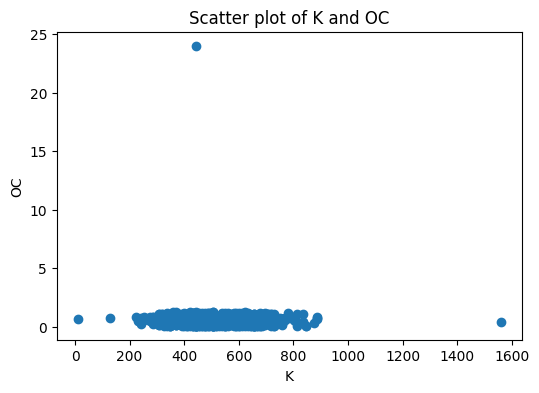

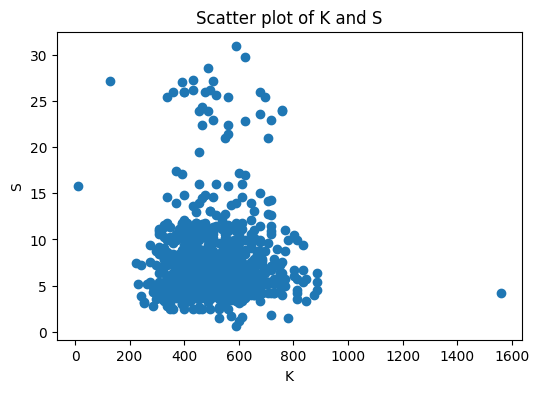

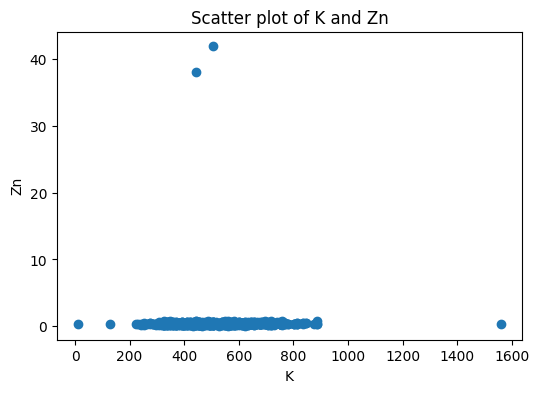

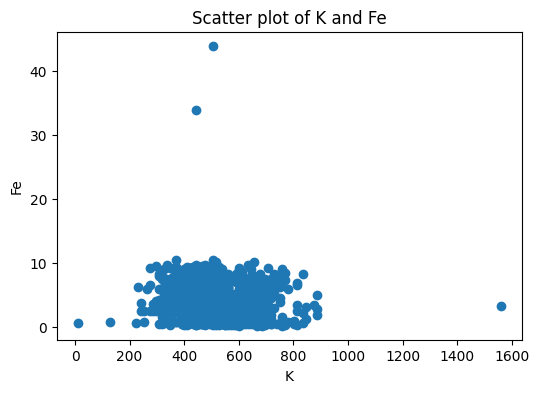

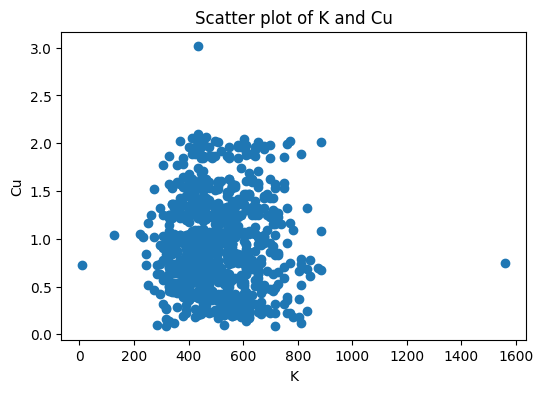

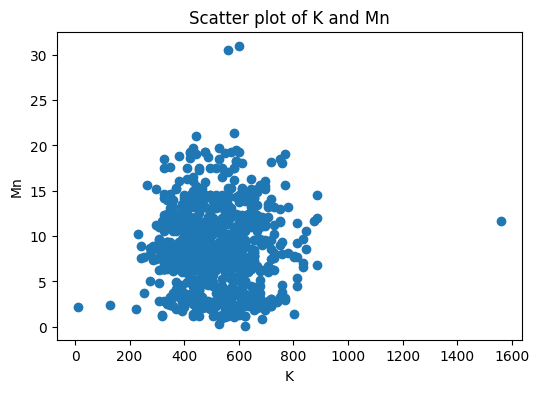

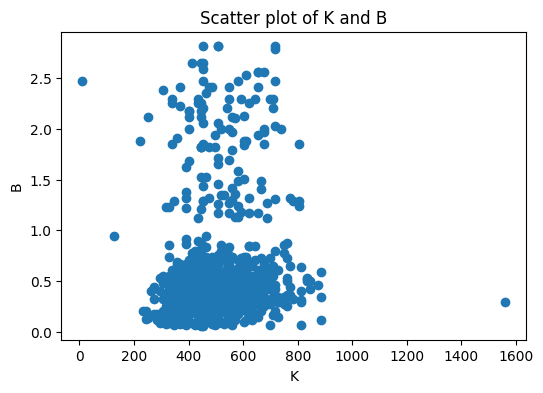

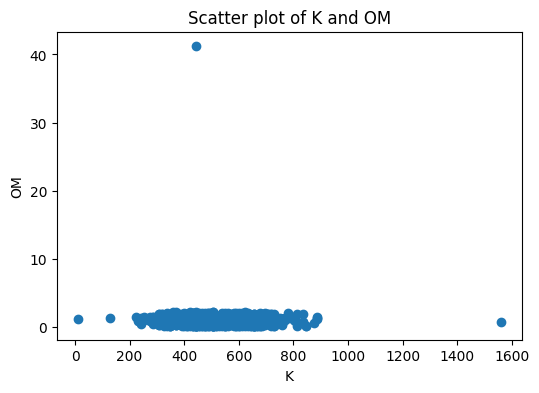

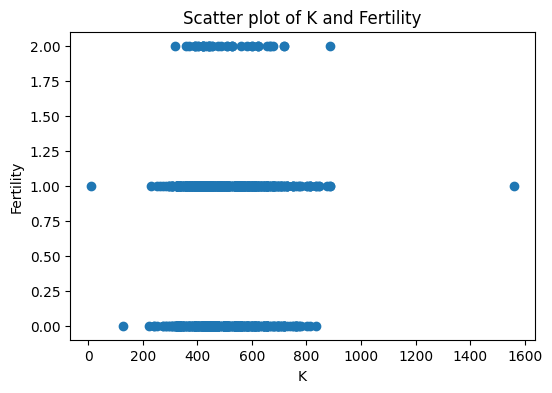

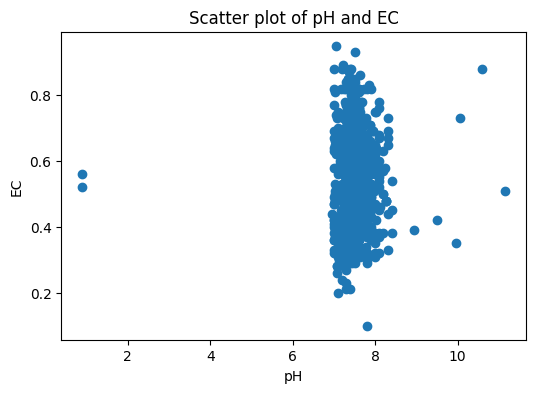

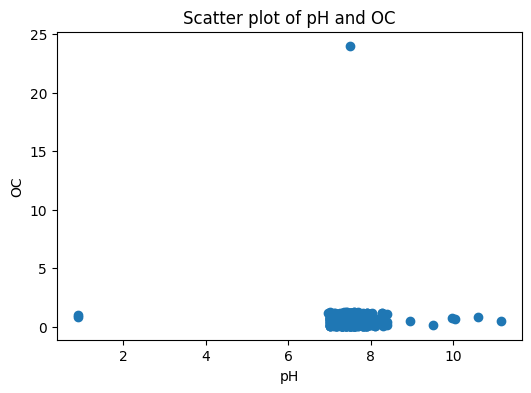

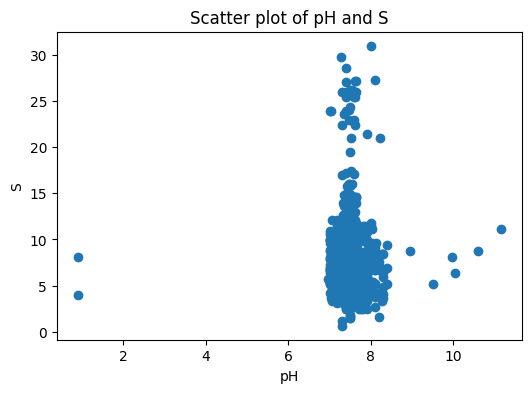

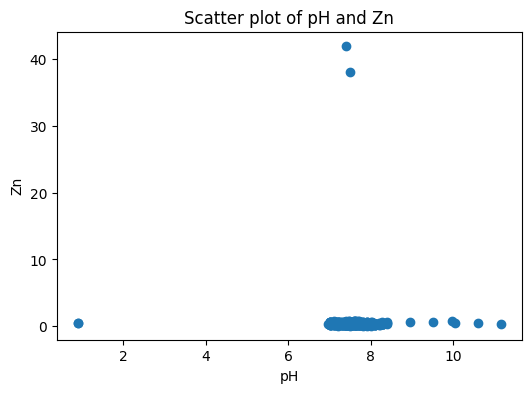

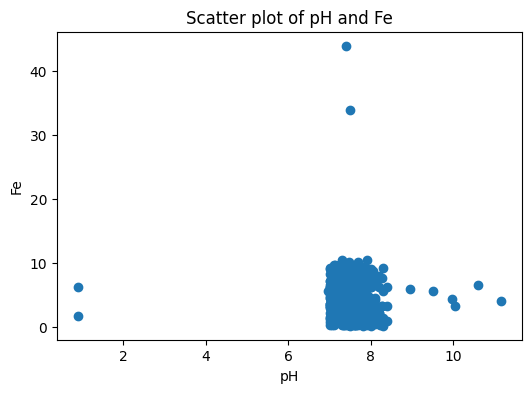

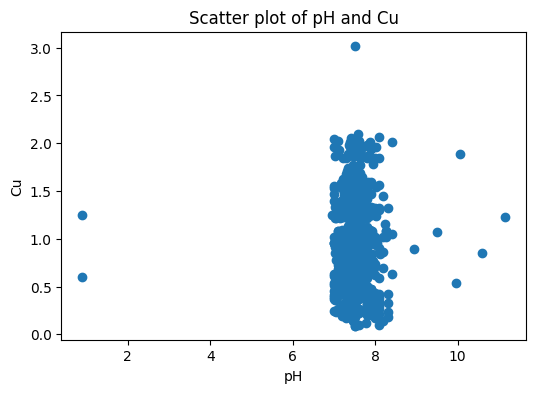

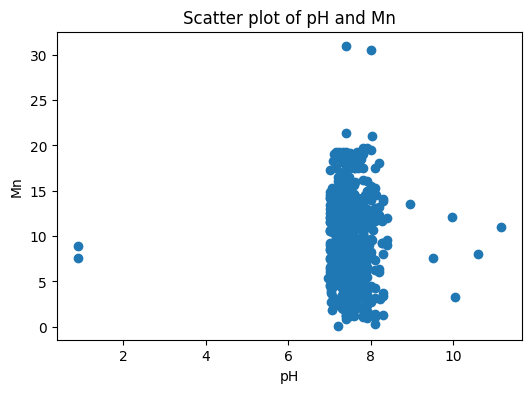

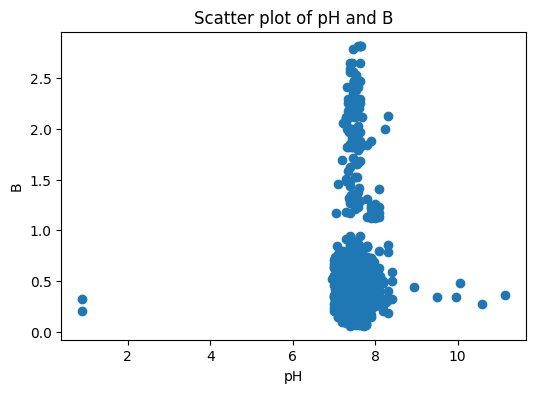

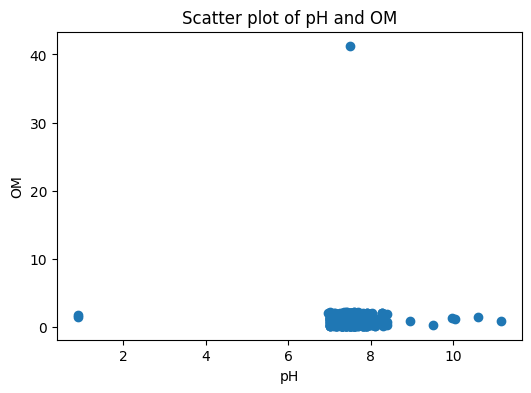

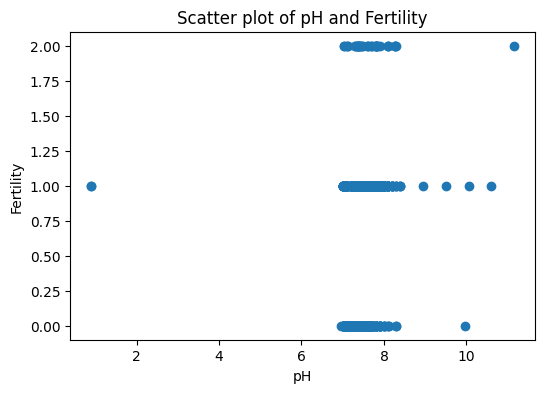

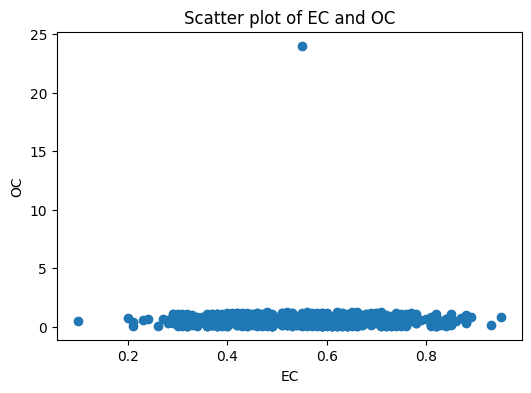

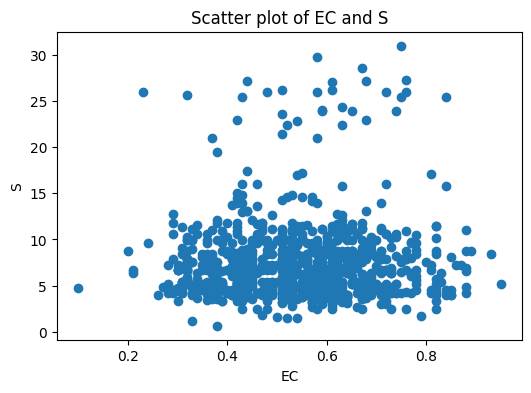

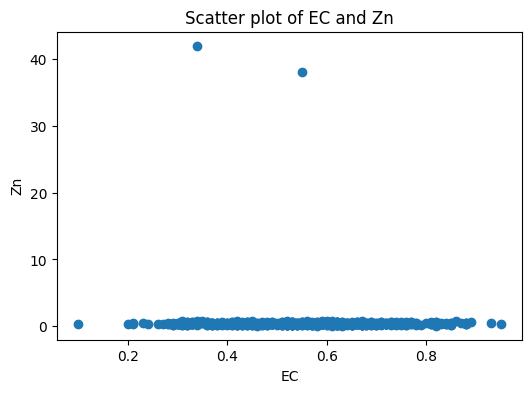

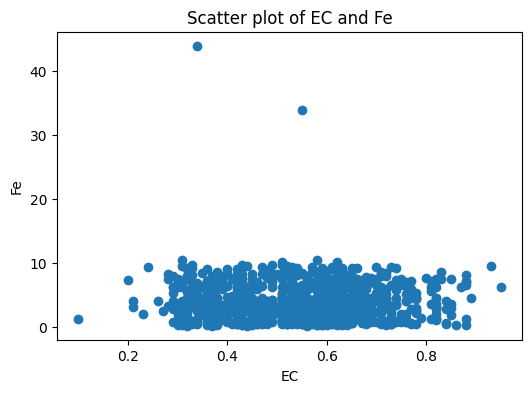

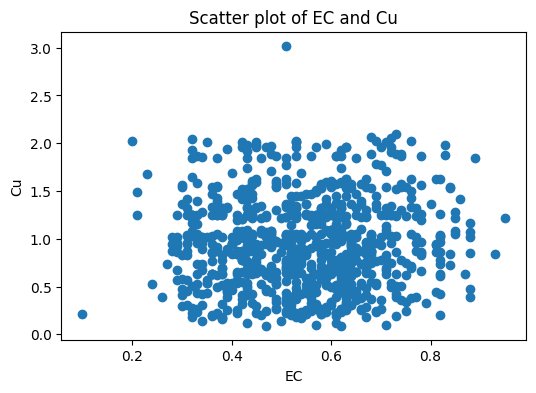

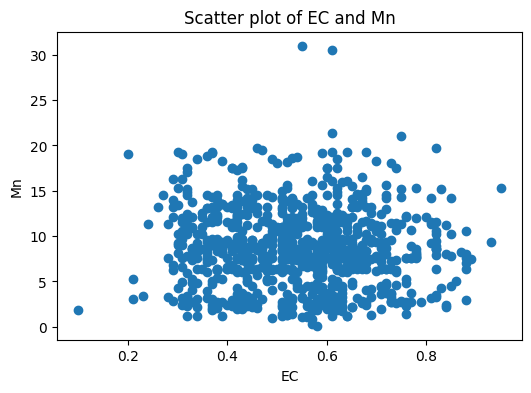

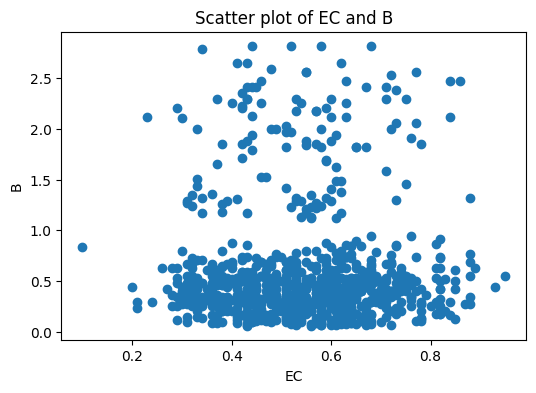

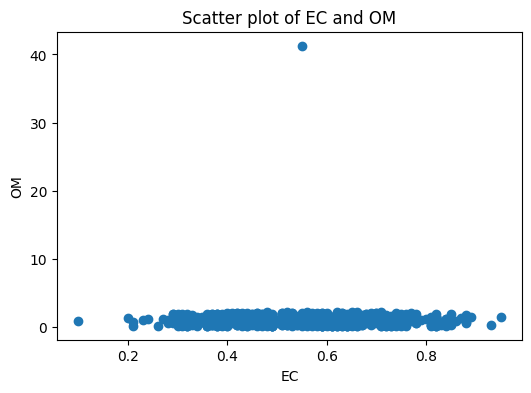

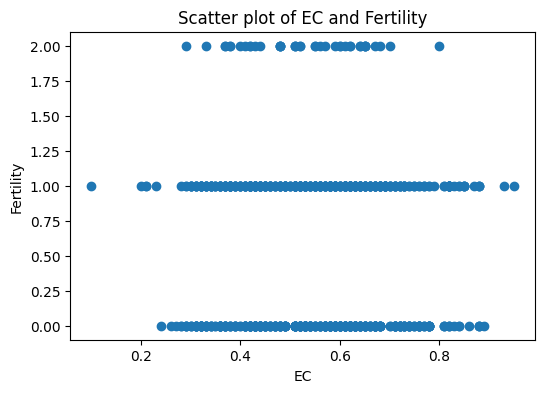

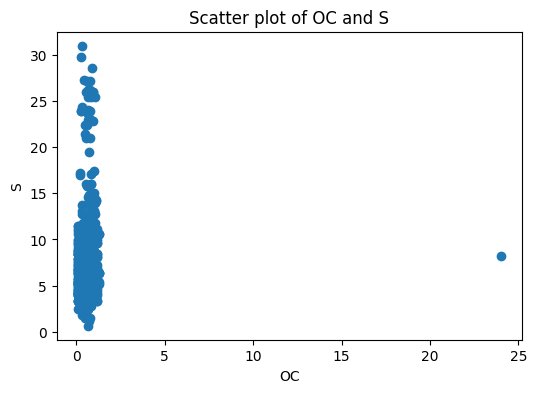

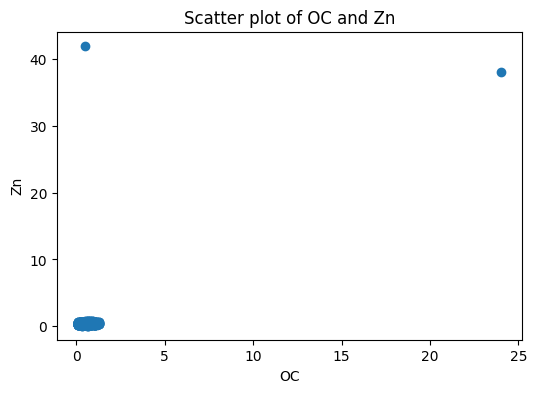

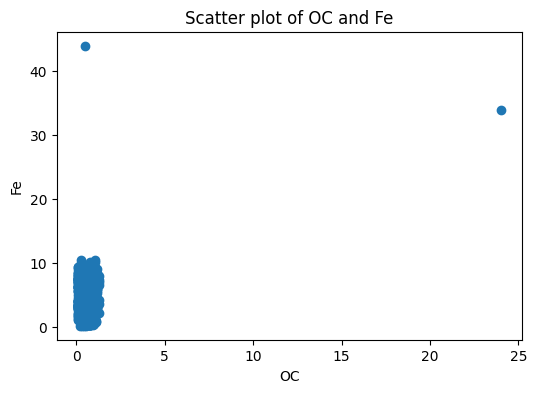

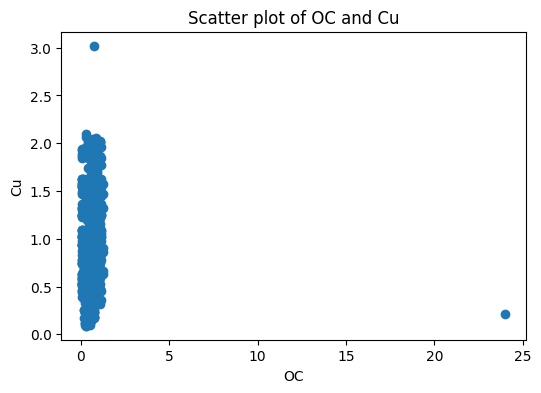

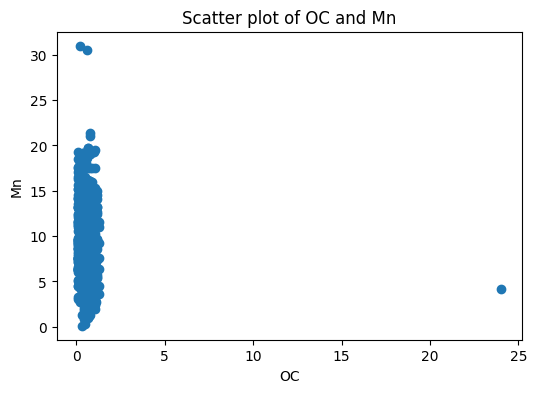

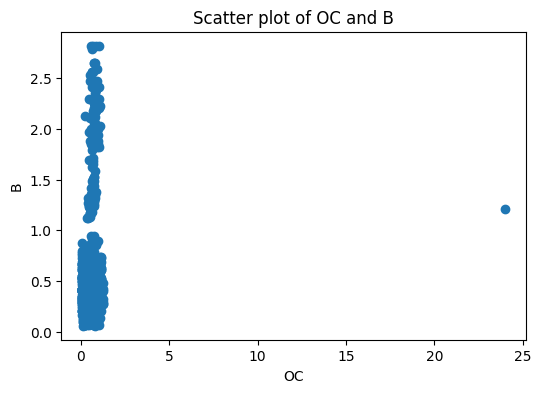

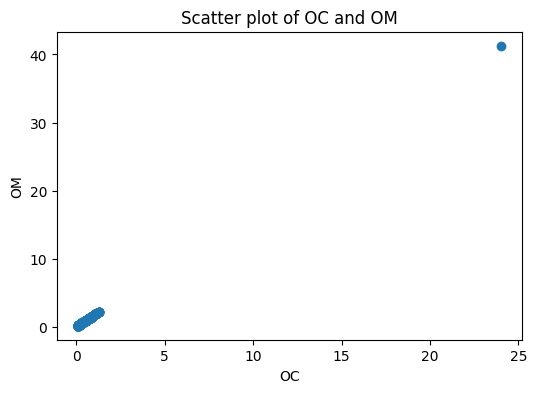

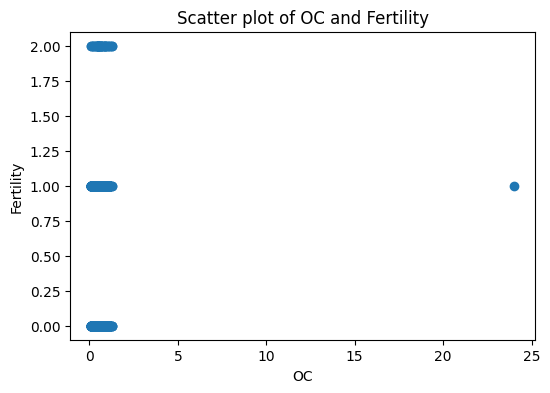

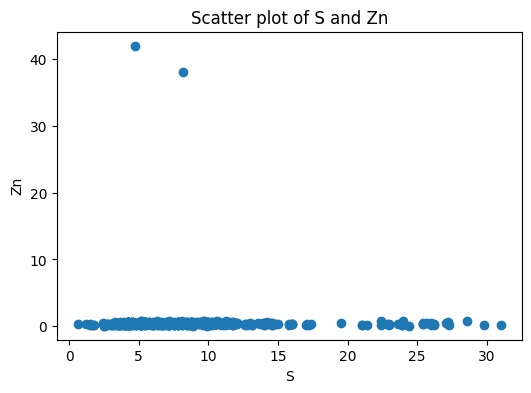

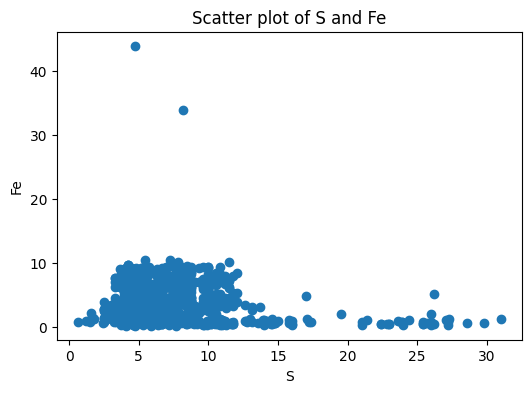

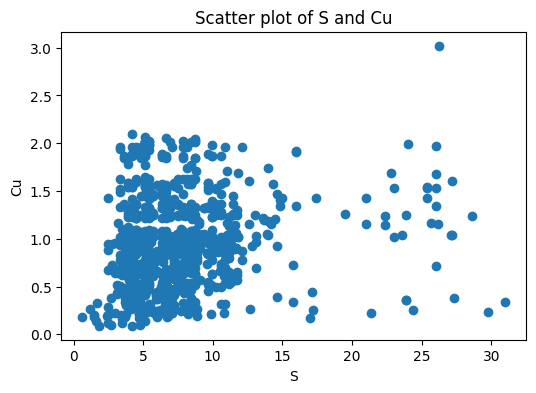

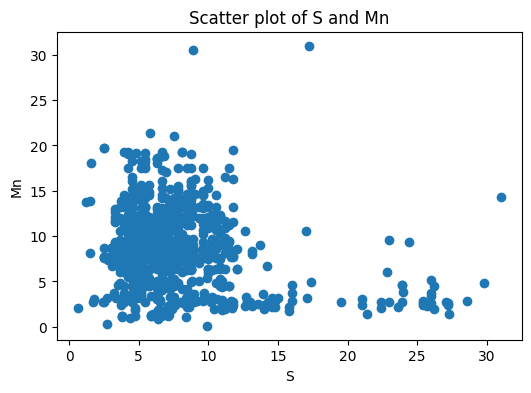

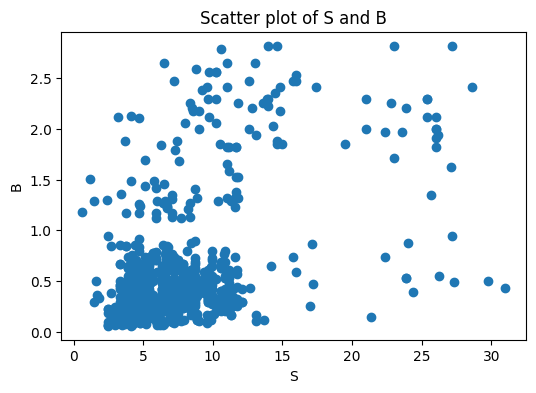

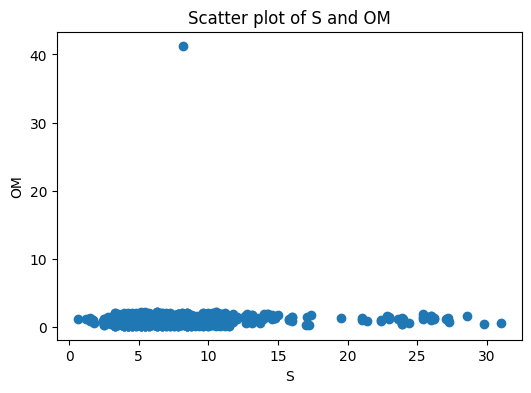

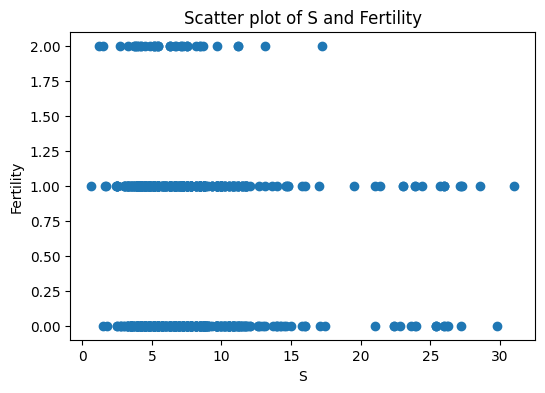

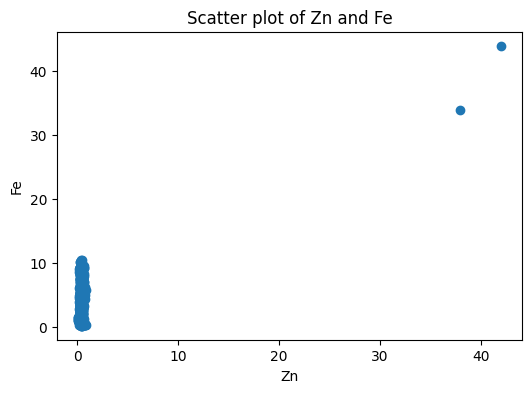

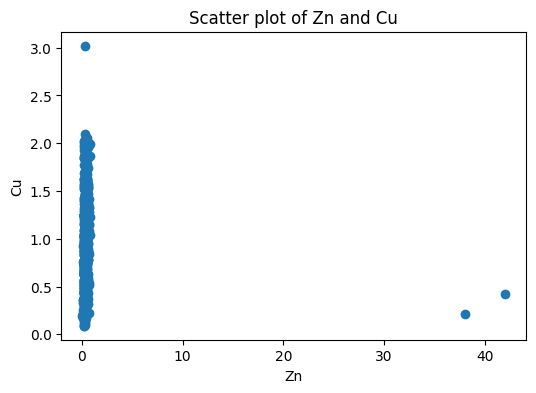

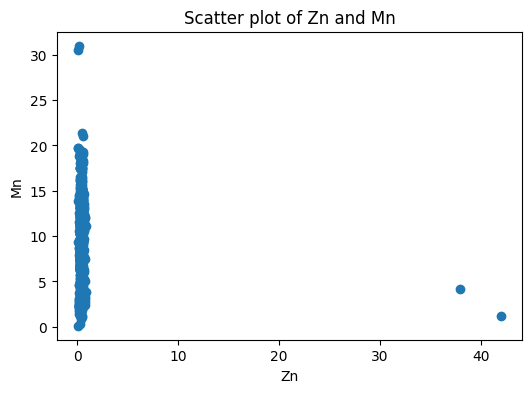

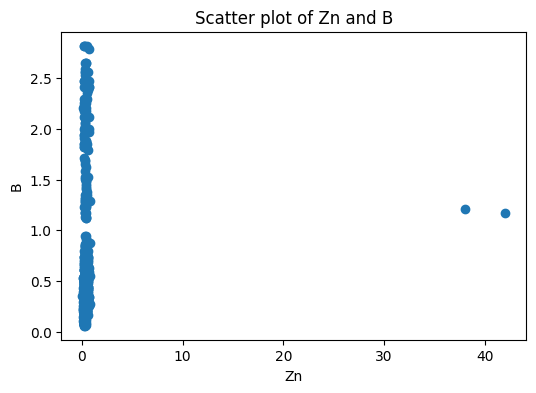

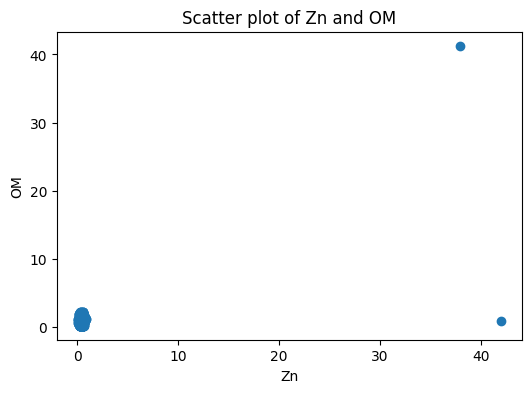

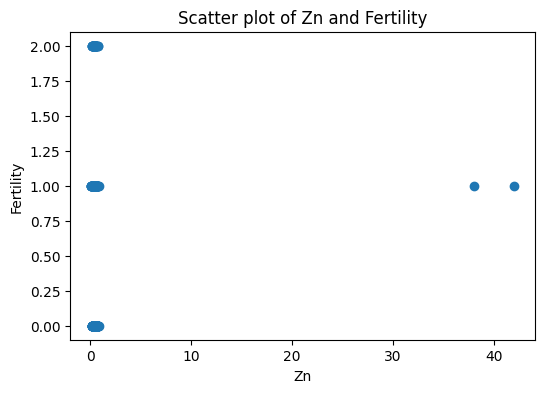

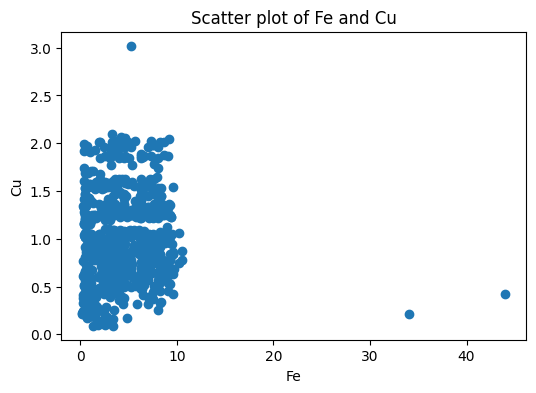

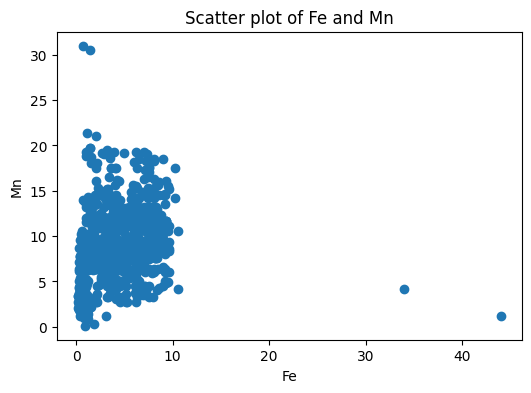

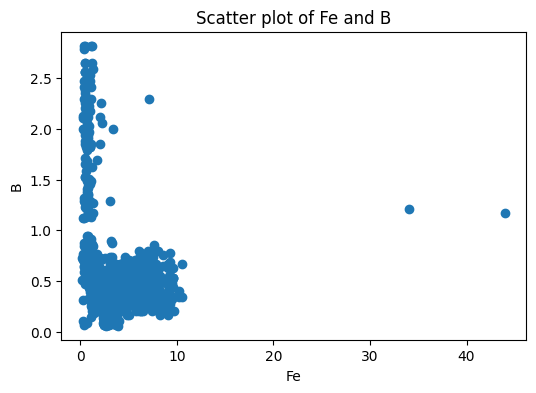

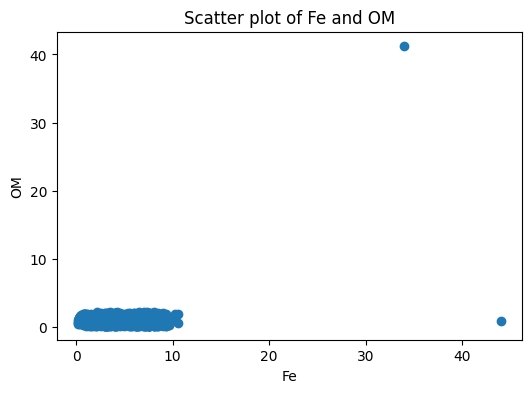

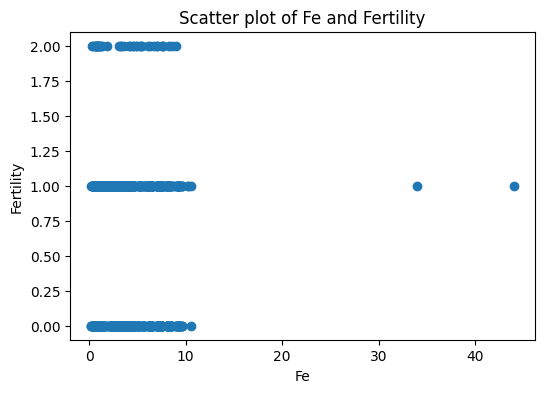

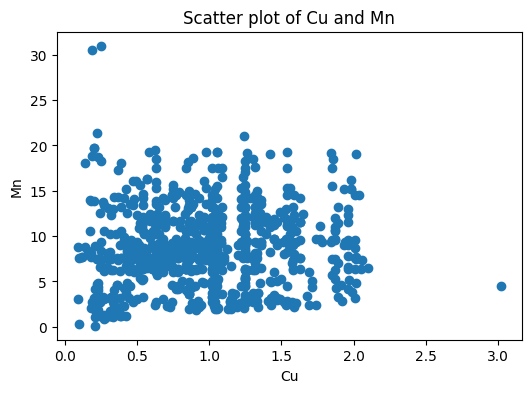

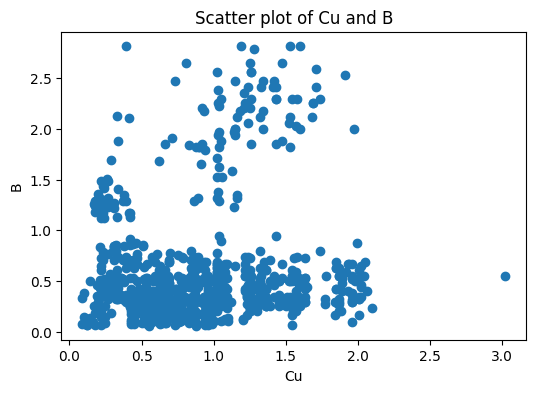

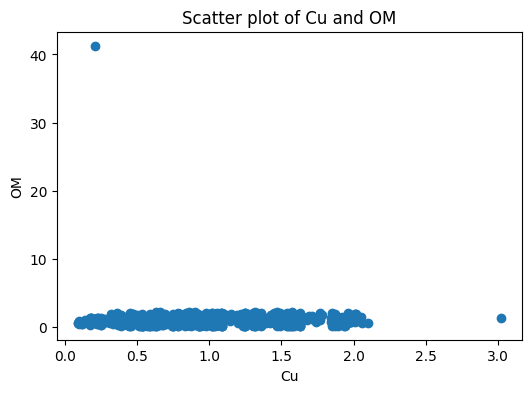

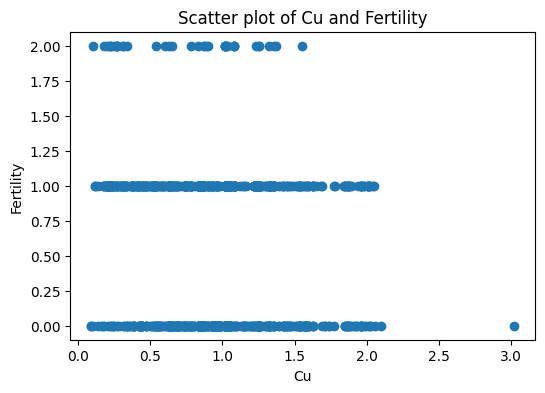

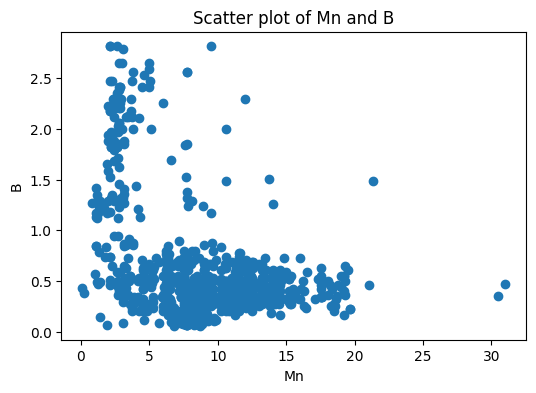

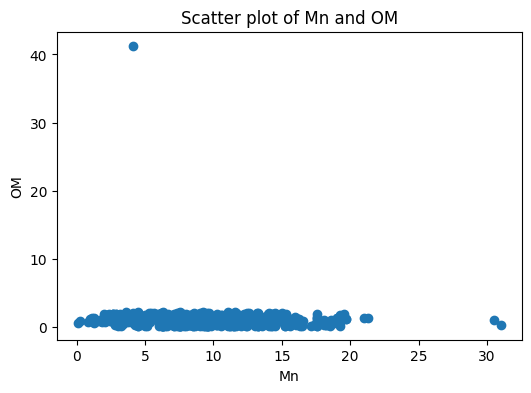

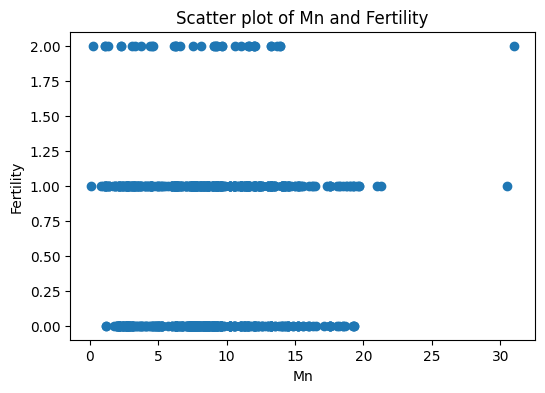

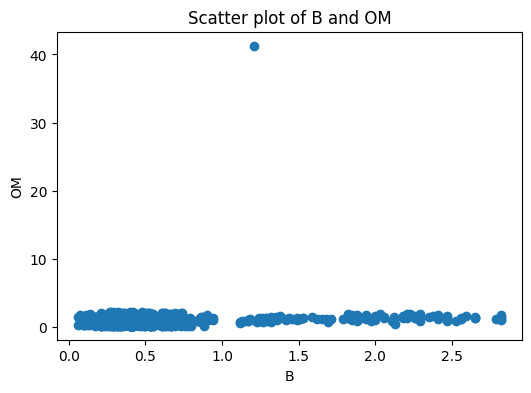

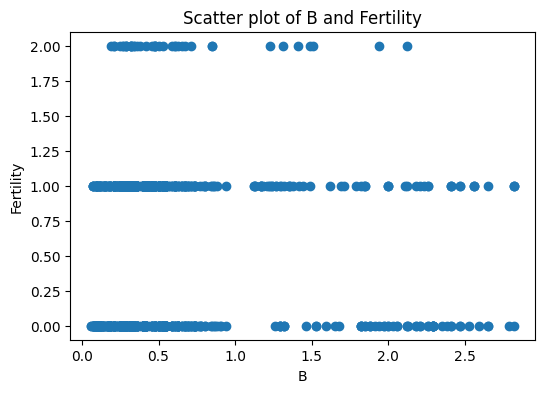

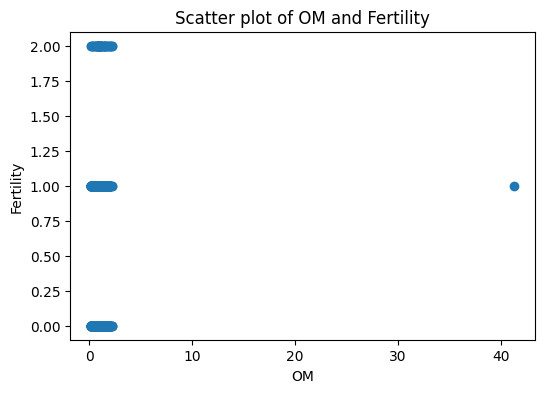

In [553]:
Set.Scatter()

In [554]:
Set.setCorrelation()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
N,1.000000,0.294500,0.050878,0.113369,-0.012303,-0.030224,-0.125639,-0.040079,0.020497,-0.172268,0.051317,0.039891,-0.030224,0.724293
P,0.294500,1.000000,0.067637,-0.023364,0.013282,0.018315,-0.094420,0.031577,0.081061,-0.035861,0.102896,0.021608,0.018315,0.457919
K,0.050878,0.067637,1.000000,-0.067332,-0.097060,-0.036616,0.029569,0.074286,-0.061789,-0.008980,-0.003766,0.187758,-0.036616,0.055523
pH,0.113369,-0.023364,-0.067332,1.000000,0.110014,0.003849,-0.005544,-0.084173,-0.068319,-0.011572,-0.063088,-0.031788,0.003849,0.093054
EC,-0.012303,0.013282,-0.097060,0.110014,1.000000,-0.024360,0.010606,-0.014733,-0.032874,0.032462,-0.065701,0.014486,-0.024360,-0.021668
OC,-0.030224,0.018315,-0.036616,0.003849,-0.024360,1.000000,0.147333,0.095277,-0.066925,0.113338,-0.137676,0.125192,1.000000,0.035205
S,-0.125639,-0.094420,0.029569,-0.005544,0.010606,0.147333,1.000000,0.062811,-0.087997,0.159607,-0.125498,0.213858,0.147333,-0.074609
Zn,-0.040079,0.031577,0.074286,-0.084173,-0.014733,0.095277,0.062811,1.000000,0.227008,0.192135,0.069763,0.204806,0.095277,-0.010762
Fe,0.020497,0.081061,-0.061789,-0.068319,-0.032874,-0.066925,-0.087997,0.227008,1.000000,0.205134,0.411653,-0.171069,-0.066925,0.018451
Cu,-0.172268,-0.035861,-0.008980,-0.011572,0.032462,0.113338,0.159607,0.192135,0.205134,1.000000,0.122223,0.051848,0.113338,-0.136479


<h1 style="color:#FFFFFF;">Part 1 : 1.2 - Données temporel </h1>

# PARTIE RULES

In [545]:
import itertools

data3 = pd.read_excel('./Data/Dataset3.xlsx')

data3

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


In [546]:
list_data3 = data3.values.tolist()
list_data3

[[24.87, 82.84, 295.61, 'Clayey', 'rice', 'DAP'],
 [28.69, 96.65, 178.96, 'laterite', 'Coconut', 'Good NPK'],
 [20.27, 81.64, 270.44, 'silty clay', 'rice', 'MOP'],
 [25.07, 95.02, 192.9, 'sandy', 'Coconut', 'Urea'],
 [25.04, 95.9, 174.8, 'coastal', 'Coconut', 'Urea'],
 [20.82, 84.13, 230.22, 'clay loam', 'rice', 'Urea'],
 [25.95, 93.41, 172.05, 'alluvial', 'Coconut', 'Urea'],
 [26.49, 80.16, 242.86, 'Clayey', 'rice', 'DAP'],
 [25.01, 95.59, 165.81, 'coastal', 'Coconut', 'Urea'],
 [21.87, 80.19, 224.56, 'silty clay', 'rice', 'Urea'],
 [28.96, 95.16, 222.8, 'alluvial', 'Coconut', 'DAP'],
 [26.3, 99.66, 215.92, 'laterite', 'Coconut', 'DAP'],
 [27.51, 94.19, 156.67, 'sandy', 'Coconut', 'Good NPK'],
 [23.68, 81.04, 233.7, 'clay loam', 'rice', 'DAP'],
 [25.52, 94.38, 178.73, 'sandy', 'Coconut', 'Urea'],
 [25.79, 82.11, 243.51, 'Clayey', 'rice', 'Urea'],
 [24.28, 80.3, 231.09, 'silty clay', 'rice', 'DAP'],
 [26.59, 90.99, 178.81, 'coastal', 'Coconut', 'Urea'],
 [28.11, 90.02, 172.48, 'laterit

In [547]:
def transaction_to_item(transaction_data):
    # Crée un dictionnaire pour compter le nombre d'occurrences de chaque élément
    dict_item = {}

    for transaction in transaction_data:
        for item in transaction:
            if item in dict_item:
                dict_item[item] += 1
            else:
                dict_item[item] = 1
    
    dict_item = {cle: dict_item[cle] for cle in sorted(dict_item , key=str.lower)}
    return dict_item

def filtre_dictionnaire(dictionnaire, Min_Supp):
    # Crée un nouveau dictionnaire pour stocker les éléments filtrés
    dictionnaire_filtré = {}

    for clé, valeur in dictionnaire.items():
        if valeur >= Min_Supp:
            dictionnaire_filtré[clé] = valeur

    return dictionnaire_filtré

def tuple_to_item(tuples):

    tuplee = list(tuples.keys())[0]

    if (type(tuplee) == tuple):
        tuples = list(tuples.keys())
        items = []
        for one_tuple in tuples:
            for item in one_tuple:

                if item not in items:
                    items.append(item)  
    else:
        items = []
        for item in tuples:
            if item not in items:
                items.append(item)  

    return items

def items_to_tuple(Items, Taille_tuple):
    Items.sort(key=str.lower)
    all_tuples = list(itertools.combinations(Items, Taille_tuple))

    dictionnaire = {}
    for one_tuple in all_tuples:
        dictionnaire[one_tuple] = 0

    return dictionnaire

def check_if_line_contains_elements(data, elements):
    for i in elements:
        count = data.count(i)
        if count == 0:
            return False
    return True

    
def update_frequence(transaction_data, tuples):
    Lk = tuples
    for ligne in transaction_data:
        for (item, valeur) in Lk.items():
            if check_if_line_contains_elements(ligne,item):
                Lk[item] += 1
    return Lk

In [548]:
def Apriori(transaction_data, Min_Supp_number = -1, Min_Supp_percent = -1):
    
    if (Min_Supp_number == -1 and Min_Supp_percent == -1):
        print("Erreur: Veuillez entrer un seuil")
        return -1
    
    if (Min_Supp_number != -1):
        Min_Supp = Min_Supp_number

    if (Min_Supp_percent != -1):
        Min_Supp = len(transaction_data)*Min_Supp_percent/100


    phase = 1
    Lk = {}
    Ck = {}
    Ck[1] = {}
    Lk[1] = {}

    # Phase 1
    Ck[phase] =     transaction_to_item(transaction_data)
    print ("Ck["    ,phase, "]\t", Ck[phase])
    Lk[phase] =     filtre_dictionnaire(Ck[phase], Min_Supp)
    print ("Lk["    ,phase, "]\t", Lk[phase])

    
    #debut boucle while

    while (Lk[phase] != {}):

        phase += 1

        #Générer toutes les combinaisons possibles formant des k-itemsets

        items       =   tuple_to_item (Lk[phase-1])
        Ck[phase]   =   items_to_tuple(items, phase)
        Ck[phase] =     update_frequence    (transaction_data, Ck[phase])

        if (len(Ck[phase]) == 0):
            break

        print ("Ck["    ,phase, "]\t", Ck[phase])

        temporary =     filtre_dictionnaire (Ck[phase], Min_Supp)
        
        if (len(temporary) == 0):
            print ("Fin de apriori")
            break

        Lk[phase] = temporary
        print ("Lk["    ,phase, "]\t", Lk[phase])
    return Lk

Min_Supp = 50


result_dict = Apriori(list_data3,Min_Supp_number=  Min_Supp)
print(result_dict)


TypeError: descriptor 'lower' for 'str' objects doesn't apply to a 'float' object

In [ ]:
result_dict

{1: {'Clayey': 54,
  'coastal': 50,
  'Coconut': 152,
  'DAP': 86,
  'MOP': 75,
  'rice': 143,
  'silty clay': 65,
  'Urea': 101},
 2: {('Clayey', 'rice'): 54,
  ('coastal', 'Coconut'): 50,
  ('Coconut', 'Urea'): 53,
  ('rice', 'silty clay'): 65}}

In [ ]:
k_items = []

for cle in range (1, len(result_dict)+1):
    for item in result_dict[cle]:
        if item not in k_items:
            k_items.append(item)


print (k_items)


['Clayey', 'coastal', 'Coconut', 'DAP', 'MOP', 'rice', 'silty clay', 'Urea', ('Clayey', 'rice'), ('coastal', 'Coconut'), ('Coconut', 'Urea'), ('rice', 'silty clay')]


In [ ]:
def calcul_taille_tuple(one_tuple):
    
    if not isinstance(one_tuple, (list, tuple  )):
        return 1
    return len(one_tuple)


def tuple_to_items(tuples):
    items = []
    if calcul_taille_tuple(tuples) == 1:
        items.append(tuples)
    
    else:
        for i in tuples:
            items.append(i)  

    return items


def ont_elements_en_commun(liste1, liste2):
    for element in liste1:
        if element in liste2:
            return True
    return False


In [ ]:
def generate_association_rules(k_items):
    rules = []

    for antecedent in k_items:
        for consequent in k_items:
            # Vérifier si l'antécédent et la conséquence sont différents
            if antecedent != consequent and not ont_elements_en_commun(tuple_to_items(antecedent), tuple_to_items(consequent) ):
                # Vérifier si l'antécédent et la conséquence ne partagent aucun item ou partie d'item
                # Ajouter la règle si toutes les conditions sont remplies
                rules.append((antecedent, consequent))

    # Afficher les règles générées
    for rule in rules:
        print(rule[0], '->', rule[1])

    return rules

rules = generate_association_rules(k_items)


Clayey -> coastal
Clayey -> Coconut
Clayey -> DAP
Clayey -> MOP
Clayey -> rice
Clayey -> silty clay
Clayey -> Urea
Clayey -> ('coastal', 'Coconut')
Clayey -> ('Coconut', 'Urea')
Clayey -> ('rice', 'silty clay')
coastal -> Clayey
coastal -> Coconut
coastal -> DAP
coastal -> MOP
coastal -> rice
coastal -> silty clay
coastal -> Urea
coastal -> ('Clayey', 'rice')
coastal -> ('Coconut', 'Urea')
coastal -> ('rice', 'silty clay')
Coconut -> Clayey
Coconut -> coastal
Coconut -> DAP
Coconut -> MOP
Coconut -> rice
Coconut -> silty clay
Coconut -> Urea
Coconut -> ('Clayey', 'rice')
Coconut -> ('rice', 'silty clay')
DAP -> Clayey
DAP -> coastal
DAP -> Coconut
DAP -> MOP
DAP -> rice
DAP -> silty clay
DAP -> Urea
DAP -> ('Clayey', 'rice')
DAP -> ('coastal', 'Coconut')
DAP -> ('Coconut', 'Urea')
DAP -> ('rice', 'silty clay')
MOP -> Clayey
MOP -> coastal
MOP -> Coconut
MOP -> DAP
MOP -> rice
MOP -> silty clay
MOP -> Urea
MOP -> ('Clayey', 'rice')
MOP -> ('coastal', 'Coconut')
MOP -> ('Coconut', 'Urea'

In [ ]:
import math


def union_items_tuples(tuple1, tuple2):
    items = []
    
    if calcul_taille_tuple(tuple1) == 1:
        items.append(tuple1)
    else:
        for i in tuple1:
            items.append(i)
    
    if calcul_taille_tuple(tuple2) == 1:
        items.append(tuple2)
    else:
        for i in tuple2:
            items.append(i)
    
    items.sort(key=str.lower)
    return items


def calculate_metrics(support_AB, support_A, support_B, total_transactions, size_A, size_B):

    confidence = support_AB / support_A if support_A != 0 else 0

    lift_denominator = (support_A / total_transactions) * (support_B / total_transactions)
    lift = support_AB / lift_denominator if lift_denominator != 0 else 0

    cosine_numerator = support_AB
    cosine_denominator = math.sqrt(support_A * support_B) * math.sqrt(size_A * size_B)
    cosine_similarity = cosine_numerator / cosine_denominator if cosine_denominator != 0 else 0

    return confidence, lift, cosine_similarity

In [ ]:


def calcul_confiance(rules, result_dict):

    confiance = {}
    lift = {}
    cosine = {}

    for rule in rules:
        
        A = rule[0]
        B = rule[1]
        A_u_B = union_items_tuples(A, B)
        
        if calcul_taille_tuple(A_u_B) <= len(result_dict):

            
            temp = result_dict[calcul_taille_tuple(A_u_B)]
            # Convert A_u_B to a tuple before using it as a key
            A_u_B_tuple = tuple(A_u_B)


            if A_u_B_tuple in temp.keys():
                Supp_A = result_dict[calcul_taille_tuple(A)][A]
                Supp_A_u_B = result_dict[calcul_taille_tuple(A_u_B_tuple)][A_u_B_tuple]

        
                confiance[A, B],lift[A, B], cosine[A, B]  = calculate_metrics(Supp_A_u_B, Supp_A, Supp_A, len(list_data3), calcul_taille_tuple(A), calcul_taille_tuple(B))


                


    return confiance, lift, cosine
        
confiance, lift, cosine = calcul_confiance(rules, result_dict)




In [ ]:
print ("confiance ")
for i in confiance:
    print (i[0],'->',i[1],':', confiance[i])

confiance 
Clayey -> rice : 1.0
coastal -> Coconut : 1.0
Coconut -> coastal : 0.32894736842105265
Coconut -> Urea : 0.34868421052631576
rice -> Clayey : 0.3776223776223776
rice -> silty clay : 0.45454545454545453
silty clay -> rice : 1.0
Urea -> Coconut : 0.5247524752475248


In [ ]:
print ("lift ")
for i in lift:
    print (i[0],'->',i[1],':', lift[i])
    

lift 
Clayey -> rice : 1611.5740740740741
coastal -> Coconut : 1740.5000000000002
Coconut -> coastal : 188.33318905817174
Coconut -> Urea : 199.63318040166206
rice -> Clayey : 229.80830358452735
rice -> silty clay : 276.6211061665607
silty clay -> rice : 1338.8461538461538
Urea -> Coconut : 452.14439760807767


In [ ]:
print ("cosine ")
for i in cosine:
    print (i[0],'->',i[1],':', cosine[i])

cosine 
Clayey -> rice : 1.0
coastal -> Coconut : 1.0
Coconut -> coastal : 0.32894736842105265
Coconut -> Urea : 0.34868421052631576
rice -> Clayey : 0.3776223776223776
rice -> silty clay : 0.45454545454545453
silty clay -> rice : 1.0
Urea -> Coconut : 0.5247524752475248


In [ ]:
Min_Conf = 0.3

def afficher_regles_confiance(confiance, Min_Conf):
    for i in confiance:
        if confiance[i] >= Min_Conf:
            print (i[0],'->',i[1],':', confiance[i])

            
afficher_regles_confiance(confiance, Min_Conf)

Clayey -> rice : 1.0
coastal -> Coconut : 1.0
Coconut -> coastal : 0.32894736842105265
Coconut -> Urea : 0.34868421052631576
rice -> Clayey : 0.3776223776223776
rice -> silty clay : 0.45454545454545453
silty clay -> rice : 1.0
Urea -> Coconut : 0.5247524752475248
